<a href="https://colab.research.google.com/github/farshid101/Deep-learning-Practice-/blob/main/Penguins_vs_Turtles_Importing_dataset_from_kagge_DP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing DataSet

### For importing dataset from kaggle , Need to **cread AIP Token** .
### After that kaggle.json file will be create . Import it to Colab **Content**
### Find the data set and copy API Command and Download the Dataset

### kaggle : https://www.kaggle.com/datasets/abbymorgan/penguins-vs-turtles


In [23]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [24]:
!kaggle datasets download -d abbymorgan/penguins-vs-turtles

penguins-vs-turtles.zip: Skipping, found more recently modified local copy (use --force to force download)


# Unzip the Zipfile

### By this **Code** you can **unzip** the zip file .

In [25]:
import zipfile
zip_ref = zipfile.ZipFile('/content/penguins-vs-turtles.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import Library

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# Finding Directory

In [27]:
!ls train

train


In [28]:
!ls train/train

image_id_000.jpg  image_id_125.jpg  image_id_250.jpg  image_id_375.jpg
image_id_001.jpg  image_id_126.jpg  image_id_251.jpg  image_id_376.jpg
image_id_002.jpg  image_id_127.jpg  image_id_252.jpg  image_id_377.jpg
image_id_003.jpg  image_id_128.jpg  image_id_253.jpg  image_id_378.jpg
image_id_004.jpg  image_id_129.jpg  image_id_254.jpg  image_id_379.jpg
image_id_005.jpg  image_id_130.jpg  image_id_255.jpg  image_id_380.jpg
image_id_006.jpg  image_id_131.jpg  image_id_256.jpg  image_id_381.jpg
image_id_007.jpg  image_id_132.jpg  image_id_257.jpg  image_id_382.jpg
image_id_008.jpg  image_id_133.jpg  image_id_258.jpg  image_id_383.jpg
image_id_009.jpg  image_id_134.jpg  image_id_259.jpg  image_id_384.jpg
image_id_010.jpg  image_id_135.jpg  image_id_260.jpg  image_id_385.jpg
image_id_011.jpg  image_id_136.jpg  image_id_261.jpg  image_id_386.jpg
image_id_012.jpg  image_id_137.jpg  image_id_262.jpg  image_id_387.jpg
image_id_013.jpg  image_id_138.jpg  image_id_263.jpg  image_id_388.jpg
image_

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  #plt.title(target_class) # Changed
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img




Image shape: (640, 640, 3)


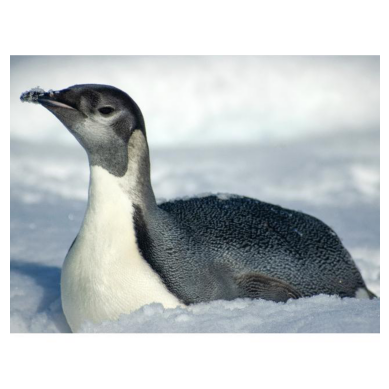

In [35]:
img = view_random_image(target_dir="train/",
                        target_class="train")

Image shape: (640, 640, 3)
Image shape: (640, 640, 3)
Image shape: (640, 640, 3)
Image shape: (640, 640, 3)


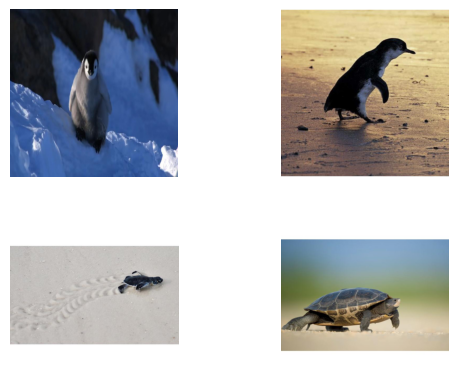

In [44]:
plt.figure()
plt.subplot(2, 2, 1)
steak_img = view_random_image("train/", "train")
plt.subplot(2, 2, 2)
pizza_img = view_random_image("valid/", "valid")
plt.subplot(2, 2, 3)
steak_img = view_random_image("train/", "train")
plt.subplot(2, 2, 4)
pizza_img = view_random_image("valid/", "valid")

In [31]:
img.shape

(640, 640, 3)

# Counting image from Directory

In [32]:
import os

num_of_image_train = len(os.listdir("train/train"))
num_of_image_valid = len(os.listdir("valid/valid"))

num_of_image_train ,  num_of_image_valid

(500, 72)

# train_annotations

In [33]:
train_annotations=[{"id": 0, "image_id": 0, "category_id": 1, "bbox": [119, 25, 205, 606], "area": 124230, "segmentation": [], "iscrowd": 0}, {"id": 1, "image_id": 1, "category_id": 1, "bbox": [131, 82, 327, 440], "area": 143880, "segmentation": [], "iscrowd": 0}, {"id": 2, "image_id": 2, "category_id": 2, "bbox": [225, 298, 198, 185], "area": 36630, "segmentation": [], "iscrowd": 0}, {"id": 3, "image_id": 3, "category_id": 2, "bbox": [468, 109, 172, 193], "area": 33196, "segmentation": [], "iscrowd": 0}, {"id": 4, "image_id": 4, "category_id": 1, "bbox": [14, 242, 611, 154], "area": 94094, "segmentation": [], "iscrowd": 0}, {"id": 5, "image_id": 5, "category_id": 1, "bbox": [18, 110, 439, 461], "area": 202379, "segmentation": [], "iscrowd": 0}, {"id": 6, "image_id": 6, "category_id": 1, "bbox": [318, 62, 321, 500], "area": 160500, "segmentation": [], "iscrowd": 0}, {"id": 7, "image_id": 7, "category_id": 2, "bbox": [154, 255, 462, 366], "area": 169092, "segmentation": [], "iscrowd": 0}, {"id": 8, "image_id": 8, "category_id": 1, "bbox": [328, 297, 246, 343], "area": 84378, "segmentation": [], "iscrowd": 0}, {"id": 9, "image_id": 9, "category_id": 2, "bbox": [163, 215, 345, 265], "area": 91425, "segmentation": [], "iscrowd": 0}, {"id": 10, "image_id": 10, "category_id": 2, "bbox": [202, 248, 126, 132], "area": 16632, "segmentation": [], "iscrowd": 0}, {"id": 11, "image_id": 11, "category_id": 2, "bbox": [72, 235, 525, 205], "area": 107625, "segmentation": [], "iscrowd": 0}, {"id": 12, "image_id": 12, "category_id": 1, "bbox": [358, 210, 153, 137], "area": 20961, "segmentation": [], "iscrowd": 0}, {"id": 13, "image_id": 13, "category_id": 1, "bbox": [193, 189, 278, 451], "area": 125378, "segmentation": [], "iscrowd": 0}, {"id": 14, "image_id": 14, "category_id": 1, "bbox": [305, 305, 33, 95], "area": 3135, "segmentation": [], "iscrowd": 0}, {"id": 15, "image_id": 15, "category_id": 1, "bbox": [21, 72, 297, 488], "area": 144936, "segmentation": [], "iscrowd": 0}, {"id": 16, "image_id": 16, "category_id": 2, "bbox": [335, 410, 79, 60], "area": 4740, "segmentation": [], "iscrowd": 0}, {"id": 17, "image_id": 17, "category_id": 2, "bbox": [141, 186, 339, 221], "area": 74919, "segmentation": [], "iscrowd": 0}, {"id": 18, "image_id": 18, "category_id": 2, "bbox": [346, 390, 74, 83], "area": 6142, "segmentation": [], "iscrowd": 0}, {"id": 19, "image_id": 19, "category_id": 2, "bbox": [89, 269, 487, 207], "area": 100809, "segmentation": [], "iscrowd": 0}, {"id": 20, "image_id": 20, "category_id": 2, "bbox": [115, 173, 224, 226], "area": 50624, "segmentation": [], "iscrowd": 0}, {"id": 21, "image_id": 21, "category_id": 1, "bbox": [344, 30, 192, 608], "area": 116736, "segmentation": [], "iscrowd": 0}, {"id": 22, "image_id": 22, "category_id": 1, "bbox": [315, 295, 33, 90], "area": 2970, "segmentation": [], "iscrowd": 0}, {"id": 23, "image_id": 23, "category_id": 2, "bbox": [147, 129, 251, 254], "area": 63754, "segmentation": [], "iscrowd": 0}, {"id": 24, "image_id": 24, "category_id": 1, "bbox": [125, 113, 438, 472], "area": 206736, "segmentation": [], "iscrowd": 0}, {"id": 25, "image_id": 25, "category_id": 1, "bbox": [2, 185, 628, 307], "area": 192796, "segmentation": [], "iscrowd": 0}, {"id": 26, "image_id": 26, "category_id": 1, "bbox": [246, 285, 344, 203], "area": 69832, "segmentation": [], "iscrowd": 0}, {"id": 27, "image_id": 27, "category_id": 2, "bbox": [72, 206, 517, 224], "area": 115808, "segmentation": [], "iscrowd": 0}, {"id": 28, "image_id": 28, "category_id": 1, "bbox": [251, 165, 225, 354], "area": 79650, "segmentation": [], "iscrowd": 0}, {"id": 29, "image_id": 29, "category_id": 1, "bbox": [242, 200, 292, 246], "area": 71832, "segmentation": [], "iscrowd": 0}, {"id": 30, "image_id": 30, "category_id": 2, "bbox": [89, 201, 363, 293], "area": 106359, "segmentation": [], "iscrowd": 0}, {"id": 31, "image_id": 31, "category_id": 2, "bbox": [214, 267, 217, 220], "area": 47740, "segmentation": [], "iscrowd": 0}, {"id": 32, "image_id": 32, "category_id": 1, "bbox": [118, 83, 384, 467], "area": 179328, "segmentation": [], "iscrowd": 0}, {"id": 33, "image_id": 33, "category_id": 2, "bbox": [251, 411, 237, 159], "area": 37683, "segmentation": [], "iscrowd": 0}, {"id": 34, "image_id": 34, "category_id": 2, "bbox": [244, 104, 197, 236], "area": 46492, "segmentation": [], "iscrowd": 0}, {"id": 35, "image_id": 35, "category_id": 1, "bbox": [441, 59, 136, 561], "area": 76296, "segmentation": [], "iscrowd": 0}, {"id": 36, "image_id": 36, "category_id": 1, "bbox": [330, 200, 134, 233], "area": 31222, "segmentation": [], "iscrowd": 0}, {"id": 37, "image_id": 37, "category_id": 1, "bbox": [149, 99, 174, 350], "area": 60900, "segmentation": [], "iscrowd": 0}, {"id": 38, "image_id": 38, "category_id": 2, "bbox": [366, 160, 274, 108], "area": 29592, "segmentation": [], "iscrowd": 0}, {"id": 39, "image_id": 39, "category_id": 2, "bbox": [67, 313, 342, 78], "area": 26676, "segmentation": [], "iscrowd": 0}, {"id": 40, "image_id": 40, "category_id": 1, "bbox": [34, 5, 371, 493], "area": 182903, "segmentation": [], "iscrowd": 0}, {"id": 41, "image_id": 41, "category_id": 2, "bbox": [230, 236, 186, 171], "area": 31806, "segmentation": [], "iscrowd": 0}, {"id": 42, "image_id": 42, "category_id": 2, "bbox": [171, 274, 298, 218], "area": 64964, "segmentation": [], "iscrowd": 0}, {"id": 43, "image_id": 43, "category_id": 2, "bbox": [234, 271, 318, 206], "area": 65508, "segmentation": [], "iscrowd": 0}, {"id": 44, "image_id": 44, "category_id": 2, "bbox": [200, 283, 206, 156], "area": 32136, "segmentation": [], "iscrowd": 0}, {"id": 45, "image_id": 45, "category_id": 1, "bbox": [110, 227, 371, 143], "area": 53053, "segmentation": [], "iscrowd": 0}, {"id": 46, "image_id": 46, "category_id": 1, "bbox": [332, 262, 97, 130], "area": 12610, "segmentation": [], "iscrowd": 0}, {"id": 47, "image_id": 47, "category_id": 2, "bbox": [147, 148, 383, 406], "area": 155498, "segmentation": [], "iscrowd": 0}, {"id": 48, "image_id": 48, "category_id": 1, "bbox": [299, 157, 115, 354], "area": 40710, "segmentation": [], "iscrowd": 0}, {"id": 49, "image_id": 49, "category_id": 2, "bbox": [144, 298, 367, 341], "area": 125147, "segmentation": [], "iscrowd": 0}, {"id": 50, "image_id": 50, "category_id": 2, "bbox": [32, 133, 506, 382], "area": 193292, "segmentation": [], "iscrowd": 0}, {"id": 51, "image_id": 51, "category_id": 2, "bbox": [149, 186, 278, 362], "area": 100636, "segmentation": [], "iscrowd": 0}, {"id": 52, "image_id": 52, "category_id": 1, "bbox": [283, 283, 38, 103], "area": 3914, "segmentation": [], "iscrowd": 0}, {"id": 53, "image_id": 53, "category_id": 1, "bbox": [70, 177, 265, 319], "area": 84535, "segmentation": [], "iscrowd": 0}, {"id": 54, "image_id": 54, "category_id": 1, "bbox": [299, 9, 263, 623], "area": 163849, "segmentation": [], "iscrowd": 0}, {"id": 55, "image_id": 55, "category_id": 1, "bbox": [6, 241, 628, 275], "area": 172700, "segmentation": [], "iscrowd": 0}, {"id": 56, "image_id": 56, "category_id": 2, "bbox": [272, 273, 299, 256], "area": 76544, "segmentation": [], "iscrowd": 0}, {"id": 57, "image_id": 57, "category_id": 1, "bbox": [311, 236, 35, 94], "area": 3290, "segmentation": [], "iscrowd": 0}, {"id": 58, "image_id": 58, "category_id": 2, "bbox": [180, 288, 309, 209], "area": 64581, "segmentation": [], "iscrowd": 0}, {"id": 59, "image_id": 59, "category_id": 2, "bbox": [216, 251, 424, 284], "area": 120416, "segmentation": [], "iscrowd": 0}, {"id": 60, "image_id": 60, "category_id": 1, "bbox": [323, 244, 105, 332], "area": 34860, "segmentation": [], "iscrowd": 0}, {"id": 61, "image_id": 61, "category_id": 1, "bbox": [71, 223, 359, 383], "area": 137497, "segmentation": [], "iscrowd": 0}, {"id": 62, "image_id": 62, "category_id": 1, "bbox": [216, 251, 424, 192], "area": 81408, "segmentation": [], "iscrowd": 0}, {"id": 63, "image_id": 63, "category_id": 1, "bbox": [463, 382, 72, 104], "area": 7488, "segmentation": [], "iscrowd": 0}, {"id": 64, "image_id": 64, "category_id": 1, "bbox": [171, 381, 182, 173], "area": 31486, "segmentation": [], "iscrowd": 0}, {"id": 65, "image_id": 65, "category_id": 1, "bbox": [72, 79, 446, 536], "area": 239056, "segmentation": [], "iscrowd": 0}, {"id": 66, "image_id": 66, "category_id": 1, "bbox": [254, 256, 174, 261], "area": 45414, "segmentation": [], "iscrowd": 0}, {"id": 67, "image_id": 67, "category_id": 2, "bbox": [164, 255, 241, 116], "area": 27956, "segmentation": [], "iscrowd": 0}, {"id": 68, "image_id": 68, "category_id": 2, "bbox": [152, 242, 332, 153], "area": 50796, "segmentation": [], "iscrowd": 0}, {"id": 69, "image_id": 69, "category_id": 1, "bbox": [325, 313, 172, 254], "area": 43688, "segmentation": [], "iscrowd": 0}, {"id": 70, "image_id": 70, "category_id": 2, "bbox": [19, 159, 530, 195], "area": 103350, "segmentation": [], "iscrowd": 0}, {"id": 71, "image_id": 71, "category_id": 1, "bbox": [111, 80, 470, 484], "area": 227480, "segmentation": [], "iscrowd": 0}, {"id": 72, "image_id": 72, "category_id": 1, "bbox": [268, 141, 152, 429], "area": 65208, "segmentation": [], "iscrowd": 0}, {"id": 73, "image_id": 73, "category_id": 1, "bbox": [94, 251, 124, 373], "area": 46252, "segmentation": [], "iscrowd": 0}, {"id": 74, "image_id": 74, "category_id": 1, "bbox": [269, 161, 103, 266], "area": 27398, "segmentation": [], "iscrowd": 0}, {"id": 75, "image_id": 75, "category_id": 1, "bbox": [274, 304, 91, 54], "area": 4914, "segmentation": [], "iscrowd": 0}, {"id": 76, "image_id": 76, "category_id": 2, "bbox": [12, 293, 622, 233], "area": 144926, "segmentation": [], "iscrowd": 0}, {"id": 77, "image_id": 77, "category_id": 1, "bbox": [176, 29, 219, 587], "area": 128553, "segmentation": [], "iscrowd": 0}, {"id": 78, "image_id": 78, "category_id": 1, "bbox": [298, 242, 132, 290], "area": 38280, "segmentation": [], "iscrowd": 0}, {"id": 79, "image_id": 79, "category_id": 1, "bbox": [302, 190, 273, 347], "area": 94731, "segmentation": [], "iscrowd": 0}, {"id": 80, "image_id": 80, "category_id": 2, "bbox": [100, 182, 295, 229], "area": 67555, "segmentation": [], "iscrowd": 0}, {"id": 81, "image_id": 81, "category_id": 1, "bbox": [42, 64, 397, 510], "area": 202470, "segmentation": [], "iscrowd": 0}, {"id": 82, "image_id": 82, "category_id": 2, "bbox": [26, 76, 550, 267], "area": 146850, "segmentation": [], "iscrowd": 0}, {"id": 83, "image_id": 83, "category_id": 2, "bbox": [157, 246, 228, 62], "area": 14136, "segmentation": [], "iscrowd": 0}, {"id": 84, "image_id": 84, "category_id": 1, "bbox": [484, 198, 106, 183], "area": 19398, "segmentation": [], "iscrowd": 0}, {"id": 85, "image_id": 85, "category_id": 2, "bbox": [89, 108, 401, 442], "area": 177242, "segmentation": [], "iscrowd": 0}, {"id": 86, "image_id": 86, "category_id": 2, "bbox": [202, 226, 205, 168], "area": 34440, "segmentation": [], "iscrowd": 0}, {"id": 87, "image_id": 87, "category_id": 2, "bbox": [120, 321, 89, 97], "area": 8633, "segmentation": [], "iscrowd": 0}, {"id": 88, "image_id": 88, "category_id": 1, "bbox": [265, 296, 88, 58], "area": 5104, "segmentation": [], "iscrowd": 0}, {"id": 89, "image_id": 89, "category_id": 1, "bbox": [222, 251, 153, 180], "area": 27540, "segmentation": [], "iscrowd": 0}, {"id": 90, "image_id": 90, "category_id": 2, "bbox": [228, 228, 328, 272], "area": 89216, "segmentation": [], "iscrowd": 0}, {"id": 91, "image_id": 91, "category_id": 1, "bbox": [247, 231, 197, 391], "area": 77027, "segmentation": [], "iscrowd": 0}, {"id": 92, "image_id": 92, "category_id": 1, "bbox": [40, 164, 286, 331], "area": 94666, "segmentation": [], "iscrowd": 0}, {"id": 93, "image_id": 93, "category_id": 1, "bbox": [298, 302, 35, 102], "area": 3570, "segmentation": [], "iscrowd": 0}, {"id": 94, "image_id": 94, "category_id": 1, "bbox": [101, 362, 262, 148], "area": 38776, "segmentation": [], "iscrowd": 0}, {"id": 95, "image_id": 95, "category_id": 2, "bbox": [61, 128, 529, 390], "area": 206310, "segmentation": [], "iscrowd": 0}, {"id": 96, "image_id": 96, "category_id": 2, "bbox": [279, 262, 228, 109], "area": 24852, "segmentation": [], "iscrowd": 0}, {"id": 97, "image_id": 97, "category_id": 1, "bbox": [352, 77, 112, 361], "area": 40432, "segmentation": [], "iscrowd": 0}, {"id": 98, "image_id": 98, "category_id": 2, "bbox": [167, 286, 385, 218], "area": 83930, "segmentation": [], "iscrowd": 0}, {"id": 99, "image_id": 99, "category_id": 1, "bbox": [234, 222, 97, 340], "area": 32980, "segmentation": [], "iscrowd": 0}, {"id": 100, "image_id": 100, "category_id": 1, "bbox": [347, 173, 214, 332], "area": 71048, "segmentation": [], "iscrowd": 0}, {"id": 101, "image_id": 101, "category_id": 2, "bbox": [203, 300, 246, 138], "area": 33948, "segmentation": [], "iscrowd": 0}, {"id": 102, "image_id": 102, "category_id": 2, "bbox": [195, 269, 284, 213], "area": 60492, "segmentation": [], "iscrowd": 0}, {"id": 103, "image_id": 103, "category_id": 2, "bbox": [284, 104, 305, 292], "area": 89060, "segmentation": [], "iscrowd": 0}, {"id": 104, "image_id": 104, "category_id": 2, "bbox": [112, 361, 317, 132], "area": 41844, "segmentation": [], "iscrowd": 0}, {"id": 105, "image_id": 105, "category_id": 1, "bbox": [224, 153, 165, 402], "area": 66330, "segmentation": [], "iscrowd": 0}, {"id": 106, "image_id": 106, "category_id": 2, "bbox": [167, 267, 288, 115], "area": 33120, "segmentation": [], "iscrowd": 0}, {"id": 107, "image_id": 107, "category_id": 2, "bbox": [139, 227, 418, 246], "area": 102828, "segmentation": [], "iscrowd": 0}, {"id": 108, "image_id": 108, "category_id": 1, "bbox": [289, 218, 70, 72], "area": 5040, "segmentation": [], "iscrowd": 0}, {"id": 109, "image_id": 109, "category_id": 2, "bbox": [162, 319, 157, 107], "area": 16799, "segmentation": [], "iscrowd": 0}, {"id": 110, "image_id": 110, "category_id": 2, "bbox": [408, 227, 172, 87], "area": 14964, "segmentation": [], "iscrowd": 0}, {"id": 111, "image_id": 111, "category_id": 1, "bbox": [124, 168, 347, 350], "area": 121450, "segmentation": [], "iscrowd": 0}, {"id": 112, "image_id": 112, "category_id": 1, "bbox": [109, 46, 213, 400], "area": 85200, "segmentation": [], "iscrowd": 0}, {"id": 113, "image_id": 113, "category_id": 1, "bbox": [46, 46, 544, 543], "area": 295392, "segmentation": [], "iscrowd": 0}, {"id": 114, "image_id": 114, "category_id": 1, "bbox": [158, 410, 121, 157], "area": 18997, "segmentation": [], "iscrowd": 0}, {"id": 115, "image_id": 115, "category_id": 1, "bbox": [125, 243, 55, 70], "area": 3850, "segmentation": [], "iscrowd": 0}, {"id": 116, "image_id": 116, "category_id": 1, "bbox": [92, 126, 351, 437], "area": 153387, "segmentation": [], "iscrowd": 0}, {"id": 117, "image_id": 117, "category_id": 1, "bbox": [256, 190, 200, 377], "area": 75400, "segmentation": [], "iscrowd": 0}, {"id": 118, "image_id": 118, "category_id": 1, "bbox": [123, 104, 254, 510], "area": 129540, "segmentation": [], "iscrowd": 0}, {"id": 119, "image_id": 119, "category_id": 2, "bbox": [73, 255, 390, 183], "area": 71370, "segmentation": [], "iscrowd": 0}, {"id": 120, "image_id": 120, "category_id": 1, "bbox": [244, 271, 151, 274], "area": 41374, "segmentation": [], "iscrowd": 0}, {"id": 121, "image_id": 121, "category_id": 2, "bbox": [161, 144, 401, 351], "area": 140751, "segmentation": [], "iscrowd": 0}, {"id": 122, "image_id": 122, "category_id": 1, "bbox": [364, 142, 120, 220], "area": 26400, "segmentation": [], "iscrowd": 0}, {"id": 123, "image_id": 123, "category_id": 2, "bbox": [147, 368, 257, 143], "area": 36751, "segmentation": [], "iscrowd": 0}, {"id": 124, "image_id": 124, "category_id": 2, "bbox": [133, 233, 288, 243], "area": 69984, "segmentation": [], "iscrowd": 0}, {"id": 125, "image_id": 125, "category_id": 2, "bbox": [113, 63, 500, 545], "area": 272500, "segmentation": [], "iscrowd": 0}, {"id": 126, "image_id": 126, "category_id": 2, "bbox": [42, 154, 580, 423], "area": 245340, "segmentation": [], "iscrowd": 0}, {"id": 127, "image_id": 127, "category_id": 2, "bbox": [0, 105, 604, 443], "area": 267572, "segmentation": [], "iscrowd": 0}, {"id": 128, "image_id": 128, "category_id": 1, "bbox": [143, 36, 278, 586], "area": 162908, "segmentation": [], "iscrowd": 0}, {"id": 129, "image_id": 129, "category_id": 2, "bbox": [248, 243, 243, 182], "area": 44226, "segmentation": [], "iscrowd": 0}, {"id": 130, "image_id": 130, "category_id": 2, "bbox": [0, 171, 432, 227], "area": 98064, "segmentation": [], "iscrowd": 0}, {"id": 131, "image_id": 131, "category_id": 2, "bbox": [82, 376, 206, 71], "area": 14626, "segmentation": [], "iscrowd": 0}, {"id": 132, "image_id": 132, "category_id": 2, "bbox": [272, 303, 94, 40], "area": 3760, "segmentation": [], "iscrowd": 0}, {"id": 133, "image_id": 133, "category_id": 1, "bbox": [128, 295, 99, 317], "area": 31383, "segmentation": [], "iscrowd": 0}, {"id": 134, "image_id": 134, "category_id": 2, "bbox": [108, 246, 391, 157], "area": 61387, "segmentation": [], "iscrowd": 0}, {"id": 135, "image_id": 135, "category_id": 2, "bbox": [182, 229, 243, 235], "area": 57105, "segmentation": [], "iscrowd": 0}, {"id": 136, "image_id": 136, "category_id": 1, "bbox": [202, 254, 110, 293], "area": 32230, "segmentation": [], "iscrowd": 0}, {"id": 137, "image_id": 137, "category_id": 2, "bbox": [261, 302, 85, 56], "area": 4760, "segmentation": [], "iscrowd": 0}, {"id": 138, "image_id": 138, "category_id": 2, "bbox": [116, 279, 510, 361], "area": 184110, "segmentation": [], "iscrowd": 0}, {"id": 139, "image_id": 139, "category_id": 2, "bbox": [18, 264, 270, 174], "area": 46980, "segmentation": [], "iscrowd": 0}, {"id": 140, "image_id": 140, "category_id": 2, "bbox": [93, 364, 273, 182], "area": 49686, "segmentation": [], "iscrowd": 0}, {"id": 141, "image_id": 141, "category_id": 2, "bbox": [272, 202, 152, 166], "area": 25232, "segmentation": [], "iscrowd": 0}, {"id": 142, "image_id": 142, "category_id": 2, "bbox": [19, 209, 616, 330], "area": 203280, "segmentation": [], "iscrowd": 0}, {"id": 143, "image_id": 143, "category_id": 1, "bbox": [231, 188, 154, 323], "area": 49742, "segmentation": [], "iscrowd": 0}, {"id": 144, "image_id": 144, "category_id": 1, "bbox": [163, 154, 273, 347], "area": 94731, "segmentation": [], "iscrowd": 0}, {"id": 145, "image_id": 145, "category_id": 2, "bbox": [214, 221, 205, 101], "area": 20705, "segmentation": [], "iscrowd": 0}, {"id": 146, "image_id": 146, "category_id": 1, "bbox": [221, 179, 84, 206], "area": 17304, "segmentation": [], "iscrowd": 0}, {"id": 147, "image_id": 147, "category_id": 2, "bbox": [84, 136, 279, 120], "area": 33480, "segmentation": [], "iscrowd": 0}, {"id": 148, "image_id": 148, "category_id": 1, "bbox": [91, 50, 254, 564], "area": 143256, "segmentation": [], "iscrowd": 0}, {"id": 149, "image_id": 149, "category_id": 2, "bbox": [455, 357, 69, 35], "area": 2415, "segmentation": [], "iscrowd": 0}, {"id": 150, "image_id": 150, "category_id": 1, "bbox": [281, 0, 314, 626], "area": 196564, "segmentation": [], "iscrowd": 0}, {"id": 151, "image_id": 151, "category_id": 2, "bbox": [83, 1, 463, 501], "area": 231963, "segmentation": [], "iscrowd": 0}, {"id": 152, "image_id": 152, "category_id": 1, "bbox": [115, 87, 364, 496], "area": 180544, "segmentation": [], "iscrowd": 0}, {"id": 153, "image_id": 153, "category_id": 1, "bbox": [26, 147, 552, 387], "area": 213624, "segmentation": [], "iscrowd": 0}, {"id": 154, "image_id": 154, "category_id": 1, "bbox": [305, 236, 145, 297], "area": 43065, "segmentation": [], "iscrowd": 0}, {"id": 155, "image_id": 155, "category_id": 2, "bbox": [213, 207, 194, 213], "area": 41322, "segmentation": [], "iscrowd": 0}, {"id": 156, "image_id": 156, "category_id": 2, "bbox": [102, 94, 445, 397], "area": 176665, "segmentation": [], "iscrowd": 0}, {"id": 157, "image_id": 157, "category_id": 2, "bbox": [31, 170, 577, 329], "area": 189833, "segmentation": [], "iscrowd": 0}, {"id": 158, "image_id": 158, "category_id": 2, "bbox": [12, 128, 300, 246], "area": 73800, "segmentation": [], "iscrowd": 0}, {"id": 159, "image_id": 159, "category_id": 1, "bbox": [259, 132, 161, 373], "area": 60053, "segmentation": [], "iscrowd": 0}, {"id": 160, "image_id": 160, "category_id": 1, "bbox": [119, 23, 315, 616], "area": 194040, "segmentation": [], "iscrowd": 0}, {"id": 161, "image_id": 161, "category_id": 2, "bbox": [118, 127, 522, 350], "area": 182700, "segmentation": [], "iscrowd": 0}, {"id": 162, "image_id": 162, "category_id": 2, "bbox": [154, 107, 451, 379], "area": 170929, "segmentation": [], "iscrowd": 0}, {"id": 163, "image_id": 163, "category_id": 2, "bbox": [93, 332, 291, 141], "area": 41031, "segmentation": [], "iscrowd": 0}, {"id": 164, "image_id": 164, "category_id": 2, "bbox": [95, 181, 340, 286], "area": 97240, "segmentation": [], "iscrowd": 0}, {"id": 165, "image_id": 165, "category_id": 1, "bbox": [103, 116, 296, 469], "area": 138824, "segmentation": [], "iscrowd": 0}, {"id": 166, "image_id": 166, "category_id": 2, "bbox": [114, 87, 384, 467], "area": 179328, "segmentation": [], "iscrowd": 0}, {"id": 167, "image_id": 167, "category_id": 1, "bbox": [283, 216, 80, 374], "area": 29920, "segmentation": [], "iscrowd": 0}, {"id": 168, "image_id": 168, "category_id": 2, "bbox": [97, 163, 438, 477], "area": 208926, "segmentation": [], "iscrowd": 0}, {"id": 169, "image_id": 169, "category_id": 2, "bbox": [177, 321, 201, 103], "area": 20703, "segmentation": [], "iscrowd": 0}, {"id": 170, "image_id": 170, "category_id": 2, "bbox": [87, 187, 296, 309], "area": 91464, "segmentation": [], "iscrowd": 0}, {"id": 171, "image_id": 171, "category_id": 2, "bbox": [4, 163, 619, 324], "area": 200556, "segmentation": [], "iscrowd": 0}, {"id": 172, "image_id": 172, "category_id": 1, "bbox": [354, 132, 128, 350], "area": 44800, "segmentation": [], "iscrowd": 0}, {"id": 173, "image_id": 173, "category_id": 1, "bbox": [39, 44, 393, 527], "area": 207111, "segmentation": [], "iscrowd": 0}, {"id": 174, "image_id": 174, "category_id": 1, "bbox": [150, 227, 211, 226], "area": 47686, "segmentation": [], "iscrowd": 0}, {"id": 175, "image_id": 175, "category_id": 2, "bbox": [243, 266, 330, 247], "area": 81510, "segmentation": [], "iscrowd": 0}, {"id": 176, "image_id": 176, "category_id": 1, "bbox": [147, 2, 365, 637], "area": 232505, "segmentation": [], "iscrowd": 0}, {"id": 177, "image_id": 177, "category_id": 1, "bbox": [215, 41, 274, 583], "area": 159742, "segmentation": [], "iscrowd": 0}, {"id": 178, "image_id": 178, "category_id": 2, "bbox": [65, 117, 528, 352], "area": 185856, "segmentation": [], "iscrowd": 0}, {"id": 179, "image_id": 179, "category_id": 2, "bbox": [34, 67, 572, 530], "area": 303160, "segmentation": [], "iscrowd": 0}, {"id": 180, "image_id": 180, "category_id": 1, "bbox": [268, 333, 80, 126], "area": 10080, "segmentation": [], "iscrowd": 0}, {"id": 181, "image_id": 181, "category_id": 2, "bbox": [1, 136, 391, 329], "area": 128639, "segmentation": [], "iscrowd": 0}, {"id": 182, "image_id": 182, "category_id": 1, "bbox": [173, 292, 328, 183], "area": 60024, "segmentation": [], "iscrowd": 0}, {"id": 183, "image_id": 183, "category_id": 2, "bbox": [187, 258, 395, 195], "area": 77025, "segmentation": [], "iscrowd": 0}, {"id": 184, "image_id": 184, "category_id": 2, "bbox": [289, 290, 88, 59], "area": 5192, "segmentation": [], "iscrowd": 0}, {"id": 185, "image_id": 185, "category_id": 2, "bbox": [91, 103, 472, 381], "area": 179832, "segmentation": [], "iscrowd": 0}, {"id": 186, "image_id": 186, "category_id": 1, "bbox": [12, 235, 321, 259], "area": 83139, "segmentation": [], "iscrowd": 0}, {"id": 187, "image_id": 187, "category_id": 1, "bbox": [272, 276, 63, 44], "area": 2772, "segmentation": [], "iscrowd": 0}, {"id": 188, "image_id": 188, "category_id": 1, "bbox": [132, 42, 385, 591], "area": 227535, "segmentation": [], "iscrowd": 0}, {"id": 189, "image_id": 189, "category_id": 1, "bbox": [441, 99, 112, 477], "area": 53424, "segmentation": [], "iscrowd": 0}, {"id": 190, "image_id": 190, "category_id": 2, "bbox": [130, 139, 421, 310], "area": 130510, "segmentation": [], "iscrowd": 0}, {"id": 191, "image_id": 191, "category_id": 2, "bbox": [21, 176, 619, 260], "area": 160940, "segmentation": [], "iscrowd": 0}, {"id": 192, "image_id": 192, "category_id": 2, "bbox": [224, 256, 204, 117], "area": 23868, "segmentation": [], "iscrowd": 0}, {"id": 193, "image_id": 193, "category_id": 2, "bbox": [279, 151, 281, 261], "area": 73341, "segmentation": [], "iscrowd": 0}, {"id": 194, "image_id": 194, "category_id": 1, "bbox": [154, 85, 126, 388], "area": 48888, "segmentation": [], "iscrowd": 0}, {"id": 195, "image_id": 195, "category_id": 2, "bbox": [324, 380, 191, 98], "area": 18718, "segmentation": [], "iscrowd": 0}, {"id": 196, "image_id": 196, "category_id": 1, "bbox": [301, 271, 41, 75], "area": 3075, "segmentation": [], "iscrowd": 0}, {"id": 197, "image_id": 197, "category_id": 2, "bbox": [181, 77, 288, 150], "area": 43200, "segmentation": [], "iscrowd": 0}, {"id": 198, "image_id": 198, "category_id": 1, "bbox": [108, 295, 310, 162], "area": 50220, "segmentation": [], "iscrowd": 0}, {"id": 199, "image_id": 199, "category_id": 2, "bbox": [29, 155, 199, 125], "area": 24875, "segmentation": [], "iscrowd": 0}, {"id": 200, "image_id": 200, "category_id": 1, "bbox": [226, 83, 185, 510], "area": 94350, "segmentation": [], "iscrowd": 0}, {"id": 201, "image_id": 201, "category_id": 1, "bbox": [46, 198, 256, 266], "area": 68096, "segmentation": [], "iscrowd": 0}, {"id": 202, "image_id": 202, "category_id": 1, "bbox": [297, 268, 40, 107], "area": 4280, "segmentation": [], "iscrowd": 0}, {"id": 203, "image_id": 203, "category_id": 2, "bbox": [156, 250, 362, 201], "area": 72762, "segmentation": [], "iscrowd": 0}, {"id": 204, "image_id": 204, "category_id": 1, "bbox": [184, 172, 268, 394], "area": 105592, "segmentation": [], "iscrowd": 0}, {"id": 205, "image_id": 205, "category_id": 2, "bbox": [159, 67, 362, 239], "area": 86518, "segmentation": [], "iscrowd": 0}, {"id": 206, "image_id": 206, "category_id": 1, "bbox": [194, 281, 280, 216], "area": 60480, "segmentation": [], "iscrowd": 0}, {"id": 207, "image_id": 207, "category_id": 2, "bbox": [67, 132, 441, 443], "area": 195363, "segmentation": [], "iscrowd": 0}, {"id": 208, "image_id": 208, "category_id": 2, "bbox": [67, 83, 447, 507], "area": 226629, "segmentation": [], "iscrowd": 0}, {"id": 209, "image_id": 209, "category_id": 2, "bbox": [216, 372, 199, 145], "area": 28855, "segmentation": [], "iscrowd": 0}, {"id": 210, "image_id": 210, "category_id": 1, "bbox": [222, 119, 168, 498], "area": 83664, "segmentation": [], "iscrowd": 0}, {"id": 211, "image_id": 211, "category_id": 1, "bbox": [50, 71, 520, 510], "area": 265200, "segmentation": [], "iscrowd": 0}, {"id": 212, "image_id": 212, "category_id": 2, "bbox": [313, 360, 44, 48], "area": 2112, "segmentation": [], "iscrowd": 0}, {"id": 213, "image_id": 213, "category_id": 2, "bbox": [75, 81, 508, 460], "area": 233680, "segmentation": [], "iscrowd": 0}, {"id": 214, "image_id": 214, "category_id": 1, "bbox": [255, 239, 140, 283], "area": 39620, "segmentation": [], "iscrowd": 0}, {"id": 215, "image_id": 215, "category_id": 1, "bbox": [275, 115, 159, 457], "area": 72663, "segmentation": [], "iscrowd": 0}, {"id": 216, "image_id": 216, "category_id": 2, "bbox": [318, 257, 165, 126], "area": 20790, "segmentation": [], "iscrowd": 0}, {"id": 217, "image_id": 217, "category_id": 2, "bbox": [345, 378, 85, 38], "area": 3230, "segmentation": [], "iscrowd": 0}, {"id": 218, "image_id": 218, "category_id": 1, "bbox": [145, 373, 150, 114], "area": 17100, "segmentation": [], "iscrowd": 0}, {"id": 219, "image_id": 219, "category_id": 1, "bbox": [125, 25, 320, 606], "area": 193920, "segmentation": [], "iscrowd": 0}, {"id": 220, "image_id": 220, "category_id": 1, "bbox": [95, 1, 407, 639], "area": 260073, "segmentation": [], "iscrowd": 0}, {"id": 221, "image_id": 221, "category_id": 2, "bbox": [8, 282, 322, 171], "area": 55062, "segmentation": [], "iscrowd": 0}, {"id": 222, "image_id": 222, "category_id": 1, "bbox": [229, 223, 95, 338], "area": 32110, "segmentation": [], "iscrowd": 0}, {"id": 223, "image_id": 223, "category_id": 1, "bbox": [82, 343, 87, 44], "area": 3828, "segmentation": [], "iscrowd": 0}, {"id": 224, "image_id": 224, "category_id": 1, "bbox": [117, 149, 247, 491], "area": 121277, "segmentation": [], "iscrowd": 0}, {"id": 225, "image_id": 225, "category_id": 2, "bbox": [170, 276, 301, 86], "area": 25886, "segmentation": [], "iscrowd": 0}, {"id": 226, "image_id": 226, "category_id": 1, "bbox": [32, 76, 386, 509], "area": 196474, "segmentation": [], "iscrowd": 0}, {"id": 227, "image_id": 227, "category_id": 2, "bbox": [284, 375, 142, 101], "area": 14342, "segmentation": [], "iscrowd": 0}, {"id": 228, "image_id": 228, "category_id": 2, "bbox": [22, 125, 246, 188], "area": 46248, "segmentation": [], "iscrowd": 0}, {"id": 229, "image_id": 229, "category_id": 2, "bbox": [148, 259, 315, 121], "area": 38115, "segmentation": [], "iscrowd": 0}, {"id": 230, "image_id": 230, "category_id": 1, "bbox": [314, 302, 94, 221], "area": 20774, "segmentation": [], "iscrowd": 0}, {"id": 231, "image_id": 231, "category_id": 2, "bbox": [12, 96, 628, 459], "area": 288252, "segmentation": [], "iscrowd": 0}, {"id": 232, "image_id": 232, "category_id": 1, "bbox": [103, 244, 322, 226], "area": 72772, "segmentation": [], "iscrowd": 0}, {"id": 233, "image_id": 233, "category_id": 2, "bbox": [35, 237, 310, 202], "area": 62620, "segmentation": [], "iscrowd": 0}, {"id": 234, "image_id": 234, "category_id": 2, "bbox": [3, 295, 579, 265], "area": 153435, "segmentation": [], "iscrowd": 0}, {"id": 235, "image_id": 235, "category_id": 2, "bbox": [3, 255, 634, 288], "area": 182592, "segmentation": [], "iscrowd": 0}, {"id": 236, "image_id": 236, "category_id": 1, "bbox": [252, 351, 197, 87], "area": 17139, "segmentation": [], "iscrowd": 0}, {"id": 237, "image_id": 237, "category_id": 2, "bbox": [177, 250, 265, 146], "area": 38690, "segmentation": [], "iscrowd": 0}, {"id": 238, "image_id": 238, "category_id": 2, "bbox": [106, 303, 432, 146], "area": 63072, "segmentation": [], "iscrowd": 0}, {"id": 239, "image_id": 239, "category_id": 2, "bbox": [108, 169, 503, 320], "area": 160960, "segmentation": [], "iscrowd": 0}, {"id": 240, "image_id": 240, "category_id": 2, "bbox": [33, 71, 555, 298], "area": 165390, "segmentation": [], "iscrowd": 0}, {"id": 241, "image_id": 241, "category_id": 1, "bbox": [291, 340, 85, 163], "area": 13855, "segmentation": [], "iscrowd": 0}, {"id": 242, "image_id": 242, "category_id": 1, "bbox": [250, 101, 118, 486], "area": 57348, "segmentation": [], "iscrowd": 0}, {"id": 243, "image_id": 243, "category_id": 2, "bbox": [183, 274, 309, 356], "area": 110004, "segmentation": [], "iscrowd": 0}, {"id": 244, "image_id": 244, "category_id": 2, "bbox": [169, 210, 393, 243], "area": 95499, "segmentation": [], "iscrowd": 0}, {"id": 245, "image_id": 245, "category_id": 2, "bbox": [299, 255, 90, 96], "area": 8640, "segmentation": [], "iscrowd": 0}, {"id": 246, "image_id": 246, "category_id": 1, "bbox": [110, 1, 501, 639], "area": 320139, "segmentation": [], "iscrowd": 0}, {"id": 247, "image_id": 247, "category_id": 2, "bbox": [164, 109, 476, 416], "area": 198016, "segmentation": [], "iscrowd": 0}, {"id": 248, "image_id": 248, "category_id": 1, "bbox": [218, 260, 257, 154], "area": 39578, "segmentation": [], "iscrowd": 0}, {"id": 249, "image_id": 249, "category_id": 2, "bbox": [253, 298, 149, 146], "area": 21754, "segmentation": [], "iscrowd": 0}, {"id": 250, "image_id": 250, "category_id": 1, "bbox": [260, 306, 114, 173], "area": 19722, "segmentation": [], "iscrowd": 0}, {"id": 251, "image_id": 251, "category_id": 1, "bbox": [274, 278, 165, 261], "area": 43065, "segmentation": [], "iscrowd": 0}, {"id": 252, "image_id": 252, "category_id": 1, "bbox": [354, 73, 196, 560], "area": 109760, "segmentation": [], "iscrowd": 0}, {"id": 253, "image_id": 253, "category_id": 1, "bbox": [7, 129, 144, 491], "area": 70704, "segmentation": [], "iscrowd": 0}, {"id": 254, "image_id": 254, "category_id": 2, "bbox": [306, 291, 90, 110], "area": 9900, "segmentation": [], "iscrowd": 0}, {"id": 255, "image_id": 255, "category_id": 1, "bbox": [181, 205, 276, 273], "area": 75348, "segmentation": [], "iscrowd": 0}, {"id": 256, "image_id": 256, "category_id": 2, "bbox": [133, 196, 327, 297], "area": 97119, "segmentation": [], "iscrowd": 0}, {"id": 257, "image_id": 257, "category_id": 2, "bbox": [218, 273, 189, 167], "area": 31563, "segmentation": [], "iscrowd": 0}, {"id": 258, "image_id": 258, "category_id": 2, "bbox": [317, 408, 212, 95], "area": 20140, "segmentation": [], "iscrowd": 0}, {"id": 259, "image_id": 259, "category_id": 2, "bbox": [206, 238, 179, 179], "area": 32041, "segmentation": [], "iscrowd": 0}, {"id": 260, "image_id": 260, "category_id": 2, "bbox": [261, 355, 100, 33], "area": 3300, "segmentation": [], "iscrowd": 0}, {"id": 261, "image_id": 261, "category_id": 2, "bbox": [309, 297, 87, 110], "area": 9570, "segmentation": [], "iscrowd": 0}, {"id": 262, "image_id": 262, "category_id": 1, "bbox": [297, 260, 66, 113], "area": 7458, "segmentation": [], "iscrowd": 0}, {"id": 263, "image_id": 263, "category_id": 2, "bbox": [205, 272, 192, 103], "area": 19776, "segmentation": [], "iscrowd": 0}, {"id": 264, "image_id": 264, "category_id": 2, "bbox": [186, 178, 262, 210], "area": 55020, "segmentation": [], "iscrowd": 0}, {"id": 265, "image_id": 265, "category_id": 1, "bbox": [164, 85, 158, 472], "area": 74576, "segmentation": [], "iscrowd": 0}, {"id": 266, "image_id": 266, "category_id": 1, "bbox": [42, 42, 436, 579], "area": 252444, "segmentation": [], "iscrowd": 0}, {"id": 267, "image_id": 267, "category_id": 2, "bbox": [39, 119, 329, 241], "area": 79289, "segmentation": [], "iscrowd": 0}, {"id": 268, "image_id": 268, "category_id": 1, "bbox": [201, 286, 331, 221], "area": 73151, "segmentation": [], "iscrowd": 0}, {"id": 269, "image_id": 269, "category_id": 1, "bbox": [320, 436, 55, 129], "area": 7095, "segmentation": [], "iscrowd": 0}, {"id": 270, "image_id": 270, "category_id": 2, "bbox": [146, 298, 480, 201], "area": 96480, "segmentation": [], "iscrowd": 0}, {"id": 271, "image_id": 271, "category_id": 2, "bbox": [265, 130, 300, 323], "area": 96900, "segmentation": [], "iscrowd": 0}, {"id": 272, "image_id": 272, "category_id": 2, "bbox": [160, 287, 289, 200], "area": 57800, "segmentation": [], "iscrowd": 0}, {"id": 273, "image_id": 273, "category_id": 2, "bbox": [201, 192, 301, 250], "area": 75250, "segmentation": [], "iscrowd": 0}, {"id": 274, "image_id": 274, "category_id": 1, "bbox": [521, 263, 70, 155], "area": 10850, "segmentation": [], "iscrowd": 0}, {"id": 275, "image_id": 275, "category_id": 2, "bbox": [7, 95, 554, 454], "area": 251516, "segmentation": [], "iscrowd": 0}, {"id": 276, "image_id": 276, "category_id": 1, "bbox": [46, 12, 284, 628], "area": 178352, "segmentation": [], "iscrowd": 0}, {"id": 277, "image_id": 277, "category_id": 1, "bbox": [81, 82, 425, 558], "area": 237150, "segmentation": [], "iscrowd": 0}, {"id": 278, "image_id": 278, "category_id": 2, "bbox": [191, 87, 389, 437], "area": 169993, "segmentation": [], "iscrowd": 0}, {"id": 279, "image_id": 279, "category_id": 1, "bbox": [224, 54, 327, 562], "area": 183774, "segmentation": [], "iscrowd": 0}, {"id": 280, "image_id": 280, "category_id": 1, "bbox": [258, 273, 127, 236], "area": 29972, "segmentation": [], "iscrowd": 0}, {"id": 281, "image_id": 281, "category_id": 1, "bbox": [158, 344, 258, 206], "area": 53148, "segmentation": [], "iscrowd": 0}, {"id": 282, "image_id": 282, "category_id": 1, "bbox": [114, 65, 368, 574], "area": 211232, "segmentation": [], "iscrowd": 0}, {"id": 283, "image_id": 283, "category_id": 2, "bbox": [153, 190, 300, 278], "area": 83400, "segmentation": [], "iscrowd": 0}, {"id": 284, "image_id": 284, "category_id": 2, "bbox": [9, 357, 446, 191], "area": 85186, "segmentation": [], "iscrowd": 0}, {"id": 285, "image_id": 285, "category_id": 2, "bbox": [126, 273, 253, 165], "area": 41745, "segmentation": [], "iscrowd": 0}, {"id": 286, "image_id": 286, "category_id": 1, "bbox": [210, 83, 218, 498], "area": 108564, "segmentation": [], "iscrowd": 0}, {"id": 287, "image_id": 287, "category_id": 1, "bbox": [286, 310, 113, 109], "area": 12317, "segmentation": [], "iscrowd": 0}, {"id": 288, "image_id": 288, "category_id": 2, "bbox": [161, 367, 178, 121], "area": 21538, "segmentation": [], "iscrowd": 0}, {"id": 289, "image_id": 289, "category_id": 2, "bbox": [195, 332, 268, 117], "area": 31356, "segmentation": [], "iscrowd": 0}, {"id": 290, "image_id": 290, "category_id": 1, "bbox": [139, 129, 154, 423], "area": 65142, "segmentation": [], "iscrowd": 0}, {"id": 291, "image_id": 291, "category_id": 2, "bbox": [65, 113, 455, 397], "area": 180635, "segmentation": [], "iscrowd": 0}, {"id": 292, "image_id": 292, "category_id": 1, "bbox": [177, 144, 227, 400], "area": 90800, "segmentation": [], "iscrowd": 0}, {"id": 293, "image_id": 293, "category_id": 2, "bbox": [47, 218, 377, 217], "area": 81809, "segmentation": [], "iscrowd": 0}, {"id": 294, "image_id": 294, "category_id": 1, "bbox": [32, 222, 565, 243], "area": 137295, "segmentation": [], "iscrowd": 0}, {"id": 295, "image_id": 295, "category_id": 1, "bbox": [249, 98, 223, 446], "area": 99458, "segmentation": [], "iscrowd": 0}, {"id": 296, "image_id": 296, "category_id": 2, "bbox": [140, 346, 349, 207], "area": 72243, "segmentation": [], "iscrowd": 0}, {"id": 297, "image_id": 297, "category_id": 2, "bbox": [106, 143, 413, 357], "area": 147441, "segmentation": [], "iscrowd": 0}, {"id": 298, "image_id": 298, "category_id": 1, "bbox": [111, 172, 153, 453], "area": 69309, "segmentation": [], "iscrowd": 0}, {"id": 299, "image_id": 299, "category_id": 2, "bbox": [144, 263, 252, 153], "area": 38556, "segmentation": [], "iscrowd": 0}, {"id": 300, "image_id": 300, "category_id": 1, "bbox": [254, 259, 83, 93], "area": 7719, "segmentation": [], "iscrowd": 0}, {"id": 301, "image_id": 301, "category_id": 2, "bbox": [308, 271, 175, 155], "area": 27125, "segmentation": [], "iscrowd": 0}, {"id": 302, "image_id": 302, "category_id": 1, "bbox": [18, 126, 617, 434], "area": 267778, "segmentation": [], "iscrowd": 0}, {"id": 303, "image_id": 303, "category_id": 2, "bbox": [195, 23, 305, 247], "area": 75335, "segmentation": [], "iscrowd": 0}, {"id": 304, "image_id": 304, "category_id": 1, "bbox": [108, 155, 135, 478], "area": 64530, "segmentation": [], "iscrowd": 0}, {"id": 305, "image_id": 305, "category_id": 1, "bbox": [154, 224, 318, 270], "area": 85860, "segmentation": [], "iscrowd": 0}, {"id": 306, "image_id": 306, "category_id": 2, "bbox": [112, 113, 486, 419], "area": 203634, "segmentation": [], "iscrowd": 0}, {"id": 307, "image_id": 307, "category_id": 2, "bbox": [235, 261, 354, 110], "area": 38940, "segmentation": [], "iscrowd": 0}, {"id": 308, "image_id": 308, "category_id": 2, "bbox": [169, 269, 307, 317], "area": 97319, "segmentation": [], "iscrowd": 0}, {"id": 309, "image_id": 309, "category_id": 1, "bbox": [98, 274, 61, 203], "area": 12383, "segmentation": [], "iscrowd": 0}, {"id": 310, "image_id": 310, "category_id": 1, "bbox": [252, 206, 192, 274], "area": 52608, "segmentation": [], "iscrowd": 0}, {"id": 311, "image_id": 311, "category_id": 1, "bbox": [161, 188, 449, 202], "area": 90698, "segmentation": [], "iscrowd": 0}, {"id": 312, "image_id": 312, "category_id": 2, "bbox": [130, 328, 381, 291], "area": 110871, "segmentation": [], "iscrowd": 0}, {"id": 313, "image_id": 313, "category_id": 2, "bbox": [14, 235, 608, 314], "area": 190912, "segmentation": [], "iscrowd": 0}, {"id": 314, "image_id": 314, "category_id": 2, "bbox": [295, 288, 113, 126], "area": 14238, "segmentation": [], "iscrowd": 0}, {"id": 315, "image_id": 315, "category_id": 1, "bbox": [70, 78, 483, 470], "area": 227010, "segmentation": [], "iscrowd": 0}, {"id": 316, "image_id": 316, "category_id": 1, "bbox": [210, 189, 110, 390], "area": 42900, "segmentation": [], "iscrowd": 0}, {"id": 317, "image_id": 317, "category_id": 2, "bbox": [76, 191, 354, 365], "area": 129210, "segmentation": [], "iscrowd": 0}, {"id": 318, "image_id": 318, "category_id": 1, "bbox": [0, 159, 403, 481], "area": 193843, "segmentation": [], "iscrowd": 0}, {"id": 319, "image_id": 319, "category_id": 2, "bbox": [224, 304, 99, 52], "area": 5148, "segmentation": [], "iscrowd": 0}, {"id": 320, "image_id": 320, "category_id": 2, "bbox": [298, 254, 49, 53], "area": 2597, "segmentation": [], "iscrowd": 0}, {"id": 321, "image_id": 321, "category_id": 2, "bbox": [126, 271, 368, 179], "area": 65872, "segmentation": [], "iscrowd": 0}, {"id": 322, "image_id": 322, "category_id": 2, "bbox": [84, 370, 160, 214], "area": 34240, "segmentation": [], "iscrowd": 0}, {"id": 323, "image_id": 323, "category_id": 1, "bbox": [108, 106, 322, 514], "area": 165508, "segmentation": [], "iscrowd": 0}, {"id": 324, "image_id": 324, "category_id": 2, "bbox": [248, 259, 143, 113], "area": 16159, "segmentation": [], "iscrowd": 0}, {"id": 325, "image_id": 325, "category_id": 1, "bbox": [393, 251, 70, 228], "area": 15960, "segmentation": [], "iscrowd": 0}, {"id": 326, "image_id": 326, "category_id": 2, "bbox": [290, 293, 199, 175], "area": 34825, "segmentation": [], "iscrowd": 0}, {"id": 327, "image_id": 327, "category_id": 1, "bbox": [98, 112, 181, 291], "area": 52671, "segmentation": [], "iscrowd": 0}, {"id": 328, "image_id": 328, "category_id": 1, "bbox": [239, 247, 115, 290], "area": 33350, "segmentation": [], "iscrowd": 0}, {"id": 329, "image_id": 329, "category_id": 2, "bbox": [152, 220, 345, 193], "area": 66585, "segmentation": [], "iscrowd": 0}, {"id": 330, "image_id": 330, "category_id": 1, "bbox": [3, 69, 634, 406], "area": 257404, "segmentation": [], "iscrowd": 0}, {"id": 331, "image_id": 331, "category_id": 2, "bbox": [39, 172, 569, 234], "area": 133146, "segmentation": [], "iscrowd": 0}, {"id": 332, "image_id": 332, "category_id": 2, "bbox": [12, 148, 606, 369], "area": 223614, "segmentation": [], "iscrowd": 0}, {"id": 333, "image_id": 333, "category_id": 2, "bbox": [170, 293, 229, 179], "area": 40991, "segmentation": [], "iscrowd": 0}, {"id": 334, "image_id": 334, "category_id": 1, "bbox": [224, 149, 172, 333], "area": 57276, "segmentation": [], "iscrowd": 0}, {"id": 335, "image_id": 335, "category_id": 1, "bbox": [290, 118, 330, 512], "area": 168960, "segmentation": [], "iscrowd": 0}, {"id": 336, "image_id": 336, "category_id": 2, "bbox": [129, 298, 392, 209], "area": 81928, "segmentation": [], "iscrowd": 0}, {"id": 337, "image_id": 337, "category_id": 1, "bbox": [264, 164, 262, 393], "area": 102966, "segmentation": [], "iscrowd": 0}, {"id": 338, "image_id": 338, "category_id": 1, "bbox": [253, 86, 220, 528], "area": 116160, "segmentation": [], "iscrowd": 0}, {"id": 339, "image_id": 339, "category_id": 2, "bbox": [111, 427, 379, 125], "area": 47375, "segmentation": [], "iscrowd": 0}, {"id": 340, "image_id": 340, "category_id": 2, "bbox": [119, 107, 436, 502], "area": 218872, "segmentation": [], "iscrowd": 0}, {"id": 341, "image_id": 341, "category_id": 1, "bbox": [459, 241, 145, 220], "area": 31900, "segmentation": [], "iscrowd": 0}, {"id": 342, "image_id": 342, "category_id": 2, "bbox": [2, 89, 638, 473], "area": 301774, "segmentation": [], "iscrowd": 0}, {"id": 343, "image_id": 343, "category_id": 1, "bbox": [163, 25, 462, 599], "area": 276738, "segmentation": [], "iscrowd": 0}, {"id": 344, "image_id": 344, "category_id": 1, "bbox": [162, 105, 230, 488], "area": 112240, "segmentation": [], "iscrowd": 0}, {"id": 345, "image_id": 345, "category_id": 2, "bbox": [193, 470, 269, 140], "area": 37660, "segmentation": [], "iscrowd": 0}, {"id": 346, "image_id": 346, "category_id": 1, "bbox": [96, 234, 126, 254], "area": 32004, "segmentation": [], "iscrowd": 0}, {"id": 347, "image_id": 347, "category_id": 1, "bbox": [237, 135, 294, 504], "area": 148176, "segmentation": [], "iscrowd": 0}, {"id": 348, "image_id": 348, "category_id": 1, "bbox": [157, 138, 385, 489], "area": 188265, "segmentation": [], "iscrowd": 0}, {"id": 349, "image_id": 349, "category_id": 1, "bbox": [46, 131, 144, 179], "area": 25776, "segmentation": [], "iscrowd": 0}, {"id": 350, "image_id": 350, "category_id": 2, "bbox": [38, 168, 593, 392], "area": 232456, "segmentation": [], "iscrowd": 0}, {"id": 351, "image_id": 351, "category_id": 2, "bbox": [53, 142, 543, 338], "area": 183534, "segmentation": [], "iscrowd": 0}, {"id": 352, "image_id": 352, "category_id": 2, "bbox": [47, 185, 479, 386], "area": 184894, "segmentation": [], "iscrowd": 0}, {"id": 353, "image_id": 353, "category_id": 1, "bbox": [129, 189, 222, 450], "area": 99900, "segmentation": [], "iscrowd": 0}, {"id": 354, "image_id": 354, "category_id": 2, "bbox": [220, 378, 190, 221], "area": 41990, "segmentation": [], "iscrowd": 0}, {"id": 355, "image_id": 355, "category_id": 1, "bbox": [332, 122, 128, 377], "area": 48256, "segmentation": [], "iscrowd": 0}, {"id": 356, "image_id": 356, "category_id": 1, "bbox": [383, 163, 139, 220], "area": 30580, "segmentation": [], "iscrowd": 0}, {"id": 357, "image_id": 357, "category_id": 1, "bbox": [103, 233, 165, 176], "area": 29040, "segmentation": [], "iscrowd": 0}, {"id": 358, "image_id": 358, "category_id": 1, "bbox": [260, 82, 157, 428], "area": 67196, "segmentation": [], "iscrowd": 0}, {"id": 359, "image_id": 359, "category_id": 2, "bbox": [136, 320, 404, 182], "area": 73528, "segmentation": [], "iscrowd": 0}, {"id": 360, "image_id": 360, "category_id": 2, "bbox": [267, 417, 101, 44], "area": 4444, "segmentation": [], "iscrowd": 0}, {"id": 361, "image_id": 361, "category_id": 2, "bbox": [281, 167, 359, 285], "area": 102315, "segmentation": [], "iscrowd": 0}, {"id": 362, "image_id": 362, "category_id": 1, "bbox": [147, 118, 276, 433], "area": 119508, "segmentation": [], "iscrowd": 0}, {"id": 363, "image_id": 363, "category_id": 2, "bbox": [73, 153, 445, 463], "area": 206035, "segmentation": [], "iscrowd": 0}, {"id": 364, "image_id": 364, "category_id": 1, "bbox": [233, 38, 152, 495], "area": 75240, "segmentation": [], "iscrowd": 0}, {"id": 365, "image_id": 365, "category_id": 1, "bbox": [99, 58, 399, 553], "area": 220647, "segmentation": [], "iscrowd": 0}, {"id": 366, "image_id": 366, "category_id": 1, "bbox": [72, 98, 455, 542], "area": 246610, "segmentation": [], "iscrowd": 0}, {"id": 367, "image_id": 367, "category_id": 2, "bbox": [43, 157, 337, 148], "area": 49876, "segmentation": [], "iscrowd": 0}, {"id": 368, "image_id": 368, "category_id": 2, "bbox": [219, 242, 168, 204], "area": 34272, "segmentation": [], "iscrowd": 0}, {"id": 369, "image_id": 369, "category_id": 2, "bbox": [99, 164, 448, 271], "area": 121408, "segmentation": [], "iscrowd": 0}, {"id": 370, "image_id": 370, "category_id": 1, "bbox": [264, 175, 164, 332], "area": 54448, "segmentation": [], "iscrowd": 0}, {"id": 371, "image_id": 371, "category_id": 1, "bbox": [59, 159, 543, 424], "area": 230232, "segmentation": [], "iscrowd": 0}, {"id": 372, "image_id": 372, "category_id": 1, "bbox": [348, 237, 114, 367], "area": 41838, "segmentation": [], "iscrowd": 0}, {"id": 373, "image_id": 373, "category_id": 1, "bbox": [131, 36, 352, 583], "area": 205216, "segmentation": [], "iscrowd": 0}, {"id": 374, "image_id": 374, "category_id": 2, "bbox": [124, 170, 415, 242], "area": 100430, "segmentation": [], "iscrowd": 0}, {"id": 375, "image_id": 375, "category_id": 2, "bbox": [63, 111, 451, 384], "area": 173184, "segmentation": [], "iscrowd": 0}, {"id": 376, "image_id": 376, "category_id": 1, "bbox": [0, 149, 328, 490], "area": 160720, "segmentation": [], "iscrowd": 0}, {"id": 377, "image_id": 377, "category_id": 1, "bbox": [94, 37, 487, 592], "area": 288304, "segmentation": [], "iscrowd": 0}, {"id": 378, "image_id": 378, "category_id": 1, "bbox": [78, 26, 388, 611], "area": 237068, "segmentation": [], "iscrowd": 0}, {"id": 379, "image_id": 379, "category_id": 1, "bbox": [247, 195, 154, 319], "area": 49126, "segmentation": [], "iscrowd": 0}, {"id": 380, "image_id": 380, "category_id": 1, "bbox": [176, 35, 273, 603], "area": 164619, "segmentation": [], "iscrowd": 0}, {"id": 381, "image_id": 381, "category_id": 1, "bbox": [184, 21, 321, 610], "area": 195810, "segmentation": [], "iscrowd": 0}, {"id": 382, "image_id": 382, "category_id": 1, "bbox": [145, 335, 301, 185], "area": 55685, "segmentation": [], "iscrowd": 0}, {"id": 383, "image_id": 383, "category_id": 2, "bbox": [261, 267, 135, 136], "area": 18360, "segmentation": [], "iscrowd": 0}, {"id": 384, "image_id": 384, "category_id": 1, "bbox": [138, 215, 367, 424], "area": 155608, "segmentation": [], "iscrowd": 0}, {"id": 385, "image_id": 385, "category_id": 2, "bbox": [135, 200, 284, 229], "area": 65036, "segmentation": [], "iscrowd": 0}, {"id": 386, "image_id": 386, "category_id": 1, "bbox": [155, 247, 291, 237], "area": 68967, "segmentation": [], "iscrowd": 0}, {"id": 387, "image_id": 387, "category_id": 2, "bbox": [103, 149, 402, 333], "area": 133866, "segmentation": [], "iscrowd": 0}, {"id": 388, "image_id": 388, "category_id": 1, "bbox": [130, 270, 332, 288], "area": 95616, "segmentation": [], "iscrowd": 0}, {"id": 389, "image_id": 389, "category_id": 1, "bbox": [280, 370, 245, 244], "area": 59780, "segmentation": [], "iscrowd": 0}, {"id": 390, "image_id": 390, "category_id": 1, "bbox": [276, 290, 67, 74], "area": 4958, "segmentation": [], "iscrowd": 0}, {"id": 391, "image_id": 391, "category_id": 2, "bbox": [300, 437, 225, 92], "area": 20700, "segmentation": [], "iscrowd": 0}, {"id": 392, "image_id": 392, "category_id": 2, "bbox": [143, 181, 233, 201], "area": 46833, "segmentation": [], "iscrowd": 0}, {"id": 393, "image_id": 393, "category_id": 2, "bbox": [93, 99, 503, 418], "area": 210254, "segmentation": [], "iscrowd": 0}, {"id": 394, "image_id": 394, "category_id": 1, "bbox": [220, 56, 350, 578], "area": 202300, "segmentation": [], "iscrowd": 0}, {"id": 395, "image_id": 395, "category_id": 2, "bbox": [162, 140, 268, 101], "area": 27068, "segmentation": [], "iscrowd": 0}, {"id": 396, "image_id": 396, "category_id": 2, "bbox": [164, 417, 268, 189], "area": 50652, "segmentation": [], "iscrowd": 0}, {"id": 397, "image_id": 397, "category_id": 2, "bbox": [203, 152, 377, 321], "area": 121017, "segmentation": [], "iscrowd": 0}, {"id": 398, "image_id": 398, "category_id": 2, "bbox": [298, 474, 184, 117], "area": 21528, "segmentation": [], "iscrowd": 0}, {"id": 399, "image_id": 399, "category_id": 1, "bbox": [43, 197, 255, 260], "area": 66300, "segmentation": [], "iscrowd": 0}, {"id": 400, "image_id": 400, "category_id": 2, "bbox": [90, 241, 536, 212], "area": 113632, "segmentation": [], "iscrowd": 0}, {"id": 401, "image_id": 401, "category_id": 1, "bbox": [283, 242, 79, 345], "area": 27255, "segmentation": [], "iscrowd": 0}, {"id": 402, "image_id": 402, "category_id": 1, "bbox": [305, 185, 125, 354], "area": 44250, "segmentation": [], "iscrowd": 0}, {"id": 403, "image_id": 403, "category_id": 2, "bbox": [33, 207, 471, 279], "area": 131409, "segmentation": [], "iscrowd": 0}, {"id": 404, "image_id": 404, "category_id": 1, "bbox": [99, 55, 439, 541], "area": 237499, "segmentation": [], "iscrowd": 0}, {"id": 405, "image_id": 405, "category_id": 1, "bbox": [75, 215, 211, 392], "area": 82712, "segmentation": [], "iscrowd": 0}, {"id": 406, "image_id": 406, "category_id": 2, "bbox": [233, 412, 242, 107], "area": 25894, "segmentation": [], "iscrowd": 0}, {"id": 407, "image_id": 407, "category_id": 1, "bbox": [207, 256, 126, 304], "area": 38304, "segmentation": [], "iscrowd": 0}, {"id": 408, "image_id": 408, "category_id": 2, "bbox": [107, 252, 254, 262], "area": 66548, "segmentation": [], "iscrowd": 0}, {"id": 409, "image_id": 409, "category_id": 1, "bbox": [159, 151, 291, 350], "area": 101850, "segmentation": [], "iscrowd": 0}, {"id": 410, "image_id": 410, "category_id": 2, "bbox": [404, 243, 67, 78], "area": 5226, "segmentation": [], "iscrowd": 0}, {"id": 411, "image_id": 411, "category_id": 2, "bbox": [141, 310, 309, 85], "area": 26265, "segmentation": [], "iscrowd": 0}, {"id": 412, "image_id": 412, "category_id": 2, "bbox": [307, 277, 234, 119], "area": 27846, "segmentation": [], "iscrowd": 0}, {"id": 413, "image_id": 413, "category_id": 2, "bbox": [161, 228, 382, 226], "area": 86332, "segmentation": [], "iscrowd": 0}, {"id": 414, "image_id": 414, "category_id": 2, "bbox": [322, 412, 89, 59], "area": 5251, "segmentation": [], "iscrowd": 0}, {"id": 415, "image_id": 415, "category_id": 1, "bbox": [160, 170, 183, 287], "area": 52521, "segmentation": [], "iscrowd": 0}, {"id": 416, "image_id": 416, "category_id": 2, "bbox": [46, 210, 475, 174], "area": 82650, "segmentation": [], "iscrowd": 0}, {"id": 417, "image_id": 417, "category_id": 1, "bbox": [205, 157, 312, 343], "area": 107016, "segmentation": [], "iscrowd": 0}, {"id": 418, "image_id": 418, "category_id": 2, "bbox": [196, 244, 357, 251], "area": 89607, "segmentation": [], "iscrowd": 0}, {"id": 419, "image_id": 419, "category_id": 2, "bbox": [286, 322, 155, 191], "area": 29605, "segmentation": [], "iscrowd": 0}, {"id": 420, "image_id": 420, "category_id": 2, "bbox": [19, 236, 469, 271], "area": 127099, "segmentation": [], "iscrowd": 0}, {"id": 421, "image_id": 421, "category_id": 1, "bbox": [236, 353, 123, 143], "area": 17589, "segmentation": [], "iscrowd": 0}, {"id": 422, "image_id": 422, "category_id": 1, "bbox": [220, 119, 233, 469], "area": 109277, "segmentation": [], "iscrowd": 0}, {"id": 423, "image_id": 423, "category_id": 1, "bbox": [375, 339, 134, 219], "area": 29346, "segmentation": [], "iscrowd": 0}, {"id": 424, "image_id": 424, "category_id": 1, "bbox": [225, 121, 179, 463], "area": 82877, "segmentation": [], "iscrowd": 0}, {"id": 425, "image_id": 425, "category_id": 1, "bbox": [204, 127, 290, 375], "area": 108750, "segmentation": [], "iscrowd": 0}, {"id": 426, "image_id": 426, "category_id": 2, "bbox": [70, 353, 223, 130], "area": 28990, "segmentation": [], "iscrowd": 0}, {"id": 427, "image_id": 427, "category_id": 2, "bbox": [1, 308, 396, 277], "area": 109692, "segmentation": [], "iscrowd": 0}, {"id": 428, "image_id": 428, "category_id": 2, "bbox": [253, 379, 112, 114], "area": 12768, "segmentation": [], "iscrowd": 0}, {"id": 429, "image_id": 429, "category_id": 2, "bbox": [24, 210, 443, 241], "area": 106763, "segmentation": [], "iscrowd": 0}, {"id": 430, "image_id": 430, "category_id": 1, "bbox": [351, 201, 197, 300], "area": 59100, "segmentation": [], "iscrowd": 0}, {"id": 431, "image_id": 431, "category_id": 2, "bbox": [296, 252, 133, 179], "area": 23807, "segmentation": [], "iscrowd": 0}, {"id": 432, "image_id": 432, "category_id": 2, "bbox": [76, 252, 517, 206], "area": 106502, "segmentation": [], "iscrowd": 0}, {"id": 433, "image_id": 433, "category_id": 1, "bbox": [237, 261, 108, 291], "area": 31428, "segmentation": [], "iscrowd": 0}, {"id": 434, "image_id": 434, "category_id": 1, "bbox": [92, 151, 304, 488], "area": 148352, "segmentation": [], "iscrowd": 0}, {"id": 435, "image_id": 435, "category_id": 1, "bbox": [218, 1, 229, 639], "area": 146331, "segmentation": [], "iscrowd": 0}, {"id": 436, "image_id": 436, "category_id": 1, "bbox": [158, 330, 199, 184], "area": 36616, "segmentation": [], "iscrowd": 0}, {"id": 437, "image_id": 437, "category_id": 2, "bbox": [1, 357, 382, 205], "area": 78310, "segmentation": [], "iscrowd": 0}, {"id": 438, "image_id": 438, "category_id": 1, "bbox": [276, 201, 68, 274], "area": 18632, "segmentation": [], "iscrowd": 0}, {"id": 439, "image_id": 439, "category_id": 1, "bbox": [195, 279, 159, 221], "area": 35139, "segmentation": [], "iscrowd": 0}, {"id": 440, "image_id": 440, "category_id": 2, "bbox": [101, 106, 469, 401], "area": 188069, "segmentation": [], "iscrowd": 0}, {"id": 441, "image_id": 441, "category_id": 1, "bbox": [229, 136, 302, 484], "area": 146168, "segmentation": [], "iscrowd": 0}, {"id": 442, "image_id": 442, "category_id": 2, "bbox": [10, 275, 630, 222], "area": 139860, "segmentation": [], "iscrowd": 0}, {"id": 443, "image_id": 443, "category_id": 2, "bbox": [200, 248, 255, 214], "area": 54570, "segmentation": [], "iscrowd": 0}, {"id": 444, "image_id": 444, "category_id": 1, "bbox": [283, 300, 113, 44], "area": 4972, "segmentation": [], "iscrowd": 0}, {"id": 445, "image_id": 445, "category_id": 1, "bbox": [261, 90, 246, 550], "area": 135300, "segmentation": [], "iscrowd": 0}, {"id": 446, "image_id": 446, "category_id": 1, "bbox": [191, 202, 268, 321], "area": 86028, "segmentation": [], "iscrowd": 0}, {"id": 447, "image_id": 447, "category_id": 1, "bbox": [209, 161, 169, 464], "area": 78416, "segmentation": [], "iscrowd": 0}, {"id": 448, "image_id": 448, "category_id": 2, "bbox": [145, 162, 392, 361], "area": 141512, "segmentation": [], "iscrowd": 0}, {"id": 449, "image_id": 449, "category_id": 1, "bbox": [186, 103, 239, 477], "area": 114003, "segmentation": [], "iscrowd": 0}, {"id": 450, "image_id": 450, "category_id": 1, "bbox": [28, 191, 262, 447], "area": 117114, "segmentation": [], "iscrowd": 0}, {"id": 451, "image_id": 451, "category_id": 1, "bbox": [161, 48, 351, 572], "area": 200772, "segmentation": [], "iscrowd": 0}, {"id": 452, "image_id": 452, "category_id": 1, "bbox": [123, 117, 315, 522], "area": 164430, "segmentation": [], "iscrowd": 0}, {"id": 453, "image_id": 453, "category_id": 1, "bbox": [208, 252, 116, 305], "area": 35380, "segmentation": [], "iscrowd": 0}, {"id": 454, "image_id": 454, "category_id": 1, "bbox": [16, 67, 160, 419], "area": 67040, "segmentation": [], "iscrowd": 0}, {"id": 455, "image_id": 455, "category_id": 2, "bbox": [160, 168, 378, 329], "area": 124362, "segmentation": [], "iscrowd": 0}, {"id": 456, "image_id": 456, "category_id": 2, "bbox": [111, 125, 322, 238], "area": 76636, "segmentation": [], "iscrowd": 0}, {"id": 457, "image_id": 457, "category_id": 2, "bbox": [95, 82, 433, 490], "area": 212170, "segmentation": [], "iscrowd": 0}, {"id": 458, "image_id": 458, "category_id": 2, "bbox": [229, 322, 370, 238], "area": 88060, "segmentation": [], "iscrowd": 0}, {"id": 459, "image_id": 459, "category_id": 1, "bbox": [398, 198, 242, 363], "area": 87846, "segmentation": [], "iscrowd": 0}, {"id": 460, "image_id": 460, "category_id": 1, "bbox": [13, 53, 515, 557], "area": 286855, "segmentation": [], "iscrowd": 0}, {"id": 461, "image_id": 461, "category_id": 2, "bbox": [261, 349, 279, 254], "area": 70866, "segmentation": [], "iscrowd": 0}, {"id": 462, "image_id": 462, "category_id": 2, "bbox": [259, 223, 297, 350], "area": 103950, "segmentation": [], "iscrowd": 0}, {"id": 463, "image_id": 463, "category_id": 1, "bbox": [249, 227, 97, 294], "area": 28518, "segmentation": [], "iscrowd": 0}, {"id": 464, "image_id": 464, "category_id": 2, "bbox": [179, 201, 461, 326], "area": 150286, "segmentation": [], "iscrowd": 0}, {"id": 465, "image_id": 465, "category_id": 1, "bbox": [303, 506, 25, 36], "area": 900, "segmentation": [], "iscrowd": 0}, {"id": 466, "image_id": 466, "category_id": 2, "bbox": [186, 214, 315, 262], "area": 82530, "segmentation": [], "iscrowd": 0}, {"id": 467, "image_id": 467, "category_id": 1, "bbox": [215, 82, 207, 497], "area": 102879, "segmentation": [], "iscrowd": 0}, {"id": 468, "image_id": 468, "category_id": 1, "bbox": [56, 161, 191, 436], "area": 83276, "segmentation": [], "iscrowd": 0}, {"id": 469, "image_id": 469, "category_id": 2, "bbox": [1, 235, 557, 244], "area": 135908, "segmentation": [], "iscrowd": 0}, {"id": 470, "image_id": 470, "category_id": 2, "bbox": [178, 281, 310, 228], "area": 70680, "segmentation": [], "iscrowd": 0}, {"id": 471, "image_id": 471, "category_id": 1, "bbox": [219, 49, 330, 570], "area": 188100, "segmentation": [], "iscrowd": 0}, {"id": 472, "image_id": 472, "category_id": 2, "bbox": [78, 99, 502, 442], "area": 221884, "segmentation": [], "iscrowd": 0}, {"id": 473, "image_id": 473, "category_id": 1, "bbox": [98, 20, 255, 549], "area": 139995, "segmentation": [], "iscrowd": 0}, {"id": 474, "image_id": 474, "category_id": 2, "bbox": [251, 203, 372, 192], "area": 71424, "segmentation": [], "iscrowd": 0}, {"id": 475, "image_id": 475, "category_id": 2, "bbox": [32, 309, 327, 163], "area": 53301, "segmentation": [], "iscrowd": 0}, {"id": 476, "image_id": 476, "category_id": 2, "bbox": [138, 193, 325, 301], "area": 97825, "segmentation": [], "iscrowd": 0}, {"id": 477, "image_id": 477, "category_id": 2, "bbox": [196, 173, 429, 317], "area": 135993, "segmentation": [], "iscrowd": 0}, {"id": 478, "image_id": 478, "category_id": 1, "bbox": [212, 407, 40, 107], "area": 4280, "segmentation": [], "iscrowd": 0}, {"id": 479, "image_id": 479, "category_id": 2, "bbox": [391, 278, 64, 25], "area": 1600, "segmentation": [], "iscrowd": 0}, {"id": 480, "image_id": 480, "category_id": 1, "bbox": [457, 87, 164, 444], "area": 72816, "segmentation": [], "iscrowd": 0}, {"id": 481, "image_id": 481, "category_id": 1, "bbox": [121, 31, 305, 591], "area": 180255, "segmentation": [], "iscrowd": 0}, {"id": 482, "image_id": 482, "category_id": 1, "bbox": [170, 87, 230, 446], "area": 102580, "segmentation": [], "iscrowd": 0}, {"id": 483, "image_id": 483, "category_id": 1, "bbox": [15, 38, 277, 583], "area": 161491, "segmentation": [], "iscrowd": 0}, {"id": 484, "image_id": 484, "category_id": 2, "bbox": [299, 363, 129, 72], "area": 9288, "segmentation": [], "iscrowd": 0}, {"id": 485, "image_id": 485, "category_id": 1, "bbox": [174, 128, 319, 348], "area": 111012, "segmentation": [], "iscrowd": 0}, {"id": 486, "image_id": 486, "category_id": 1, "bbox": [96, 43, 507, 570], "area": 288990, "segmentation": [], "iscrowd": 0}, {"id": 487, "image_id": 487, "category_id": 2, "bbox": [70, 152, 559, 306], "area": 171054, "segmentation": [], "iscrowd": 0}, {"id": 488, "image_id": 488, "category_id": 1, "bbox": [18, 42, 390, 570], "area": 222300, "segmentation": [], "iscrowd": 0}, {"id": 489, "image_id": 489, "category_id": 2, "bbox": [115, 176, 224, 223], "area": 49952, "segmentation": [], "iscrowd": 0}, {"id": 490, "image_id": 490, "category_id": 2, "bbox": [198, 290, 282, 132], "area": 37224, "segmentation": [], "iscrowd": 0}, {"id": 491, "image_id": 491, "category_id": 1, "bbox": [176, 48, 279, 546], "area": 152334, "segmentation": [], "iscrowd": 0}, {"id": 492, "image_id": 492, "category_id": 1, "bbox": [223, 224, 278, 322], "area": 89516, "segmentation": [], "iscrowd": 0}, {"id": 493, "image_id": 493, "category_id": 2, "bbox": [139, 178, 392, 357], "area": 139944, "segmentation": [], "iscrowd": 0}, {"id": 494, "image_id": 494, "category_id": 2, "bbox": [313, 425, 54, 37], "area": 1998, "segmentation": [], "iscrowd": 0}, {"id": 495, "image_id": 495, "category_id": 2, "bbox": [92, 203, 456, 230], "area": 104880, "segmentation": [], "iscrowd": 0}, {"id": 496, "image_id": 496, "category_id": 1, "bbox": [229, 359, 144, 131], "area": 18864, "segmentation": [], "iscrowd": 0}, {"id": 497, "image_id": 497, "category_id": 1, "bbox": [258, 183, 126, 323], "area": 40698, "segmentation": [], "iscrowd": 0}, {"id": 498, "image_id": 498, "category_id": 1, "bbox": [140, 55, 336, 517], "area": 173712, "segmentation": [], "iscrowd": 0}, {"id": 499, "image_id": 499, "category_id": 2, "bbox": [13, 240, 477, 258], "area": 123066, "segmentation": [], "iscrowd": 0}]

# valid_annotations

In [96]:
valid_annotations=[{"id": 0, "image_id": 0, "category_id": 1, "bbox": [227, 93, 298, 525], "area": 156450, "segmentation": [], "iscrowd": 0}, {"id": 1, "image_id": 1, "category_id": 2, "bbox": [211, 198, 428, 259], "area": 110852, "segmentation": [], "iscrowd": 0}, {"id": 2, "image_id": 2, "category_id": 2, "bbox": [0, 243, 512, 267], "area": 136704, "segmentation": [], "iscrowd": 0}, {"id": 3, "image_id": 3, "category_id": 1, "bbox": [128, 178, 457, 354], "area": 161778, "segmentation": [], "iscrowd": 0}, {"id": 4, "image_id": 4, "category_id": 1, "bbox": [168, 131, 296, 469], "area": 138824, "segmentation": [], "iscrowd": 0}, {"id": 5, "image_id": 5, "category_id": 1, "bbox": [6, 121, 445, 471], "area": 209595, "segmentation": [], "iscrowd": 0}, {"id": 6, "image_id": 6, "category_id": 2, "bbox": [63, 161, 438, 322], "area": 141036, "segmentation": [], "iscrowd": 0}, {"id": 7, "image_id": 7, "category_id": 1, "bbox": [188, 252, 254, 276], "area": 70104, "segmentation": [], "iscrowd": 0}, {"id": 8, "image_id": 8, "category_id": 1, "bbox": [375, 237, 189, 315], "area": 59535, "segmentation": [], "iscrowd": 0}, {"id": 9, "image_id": 9, "category_id": 1, "bbox": [364, 223, 141, 246], "area": 34686, "segmentation": [], "iscrowd": 0}, {"id": 10, "image_id": 10, "category_id": 2, "bbox": [155, 173, 485, 360], "area": 174600, "segmentation": [], "iscrowd": 0}, {"id": 11, "image_id": 11, "category_id": 2, "bbox": [133, 271, 351, 116], "area": 40716, "segmentation": [], "iscrowd": 0}, {"id": 12, "image_id": 12, "category_id": 2, "bbox": [141, 39, 499, 382], "area": 190618, "segmentation": [], "iscrowd": 0}, {"id": 13, "image_id": 13, "category_id": 2, "bbox": [126, 414, 393, 151], "area": 59343, "segmentation": [], "iscrowd": 0}, {"id": 14, "image_id": 14, "category_id": 1, "bbox": [178, 119, 286, 483], "area": 138138, "segmentation": [], "iscrowd": 0}, {"id": 15, "image_id": 15, "category_id": 1, "bbox": [363, 187, 255, 219], "area": 55845, "segmentation": [], "iscrowd": 0}, {"id": 16, "image_id": 16, "category_id": 2, "bbox": [103, 167, 496, 266], "area": 131936, "segmentation": [], "iscrowd": 0}, {"id": 17, "image_id": 17, "category_id": 1, "bbox": [60, 167, 486, 473], "area": 229878, "segmentation": [], "iscrowd": 0}, {"id": 18, "image_id": 18, "category_id": 2, "bbox": [164, 284, 156, 73], "area": 11388, "segmentation": [], "iscrowd": 0}, {"id": 19, "image_id": 19, "category_id": 2, "bbox": [114, 205, 511, 223], "area": 113953, "segmentation": [], "iscrowd": 0}, {"id": 20, "image_id": 20, "category_id": 1, "bbox": [137, 111, 396, 405], "area": 160380, "segmentation": [], "iscrowd": 0}, {"id": 21, "image_id": 21, "category_id": 1, "bbox": [159, 321, 283, 227], "area": 64241, "segmentation": [], "iscrowd": 0}, {"id": 22, "image_id": 22, "category_id": 2, "bbox": [0, 228, 414, 208], "area": 86112, "segmentation": [], "iscrowd": 0}, {"id": 23, "image_id": 23, "category_id": 1, "bbox": [156, 248, 358, 285], "area": 102030, "segmentation": [], "iscrowd": 0}, {"id": 24, "image_id": 24, "category_id": 1, "bbox": [43, 138, 258, 388], "area": 100104, "segmentation": [], "iscrowd": 0}, {"id": 25, "image_id": 25, "category_id": 1, "bbox": [35, 209, 604, 203], "area": 122612, "segmentation": [], "iscrowd": 0}, {"id": 26, "image_id": 26, "category_id": 2, "bbox": [4, 169, 486, 350], "area": 170100, "segmentation": [], "iscrowd": 0}, {"id": 27, "image_id": 27, "category_id": 2, "bbox": [252, 168, 388, 218], "area": 84584, "segmentation": [], "iscrowd": 0}, {"id": 28, "image_id": 28, "category_id": 1, "bbox": [223, 256, 233, 116], "area": 27028, "segmentation": [], "iscrowd": 0}, {"id": 29, "image_id": 29, "category_id": 1, "bbox": [193, 231, 359, 223], "area": 80057, "segmentation": [], "iscrowd": 0}, {"id": 30, "image_id": 30, "category_id": 2, "bbox": [61, 127, 453, 453], "area": 205209, "segmentation": [], "iscrowd": 0}, {"id": 31, "image_id": 31, "category_id": 2, "bbox": [171, 297, 293, 143], "area": 41899, "segmentation": [], "iscrowd": 0}, {"id": 32, "image_id": 32, "category_id": 1, "bbox": [76, 179, 406, 355], "area": 144130, "segmentation": [], "iscrowd": 0}, {"id": 33, "image_id": 33, "category_id": 2, "bbox": [75, 306, 348, 144], "area": 50112, "segmentation": [], "iscrowd": 0}, {"id": 34, "image_id": 34, "category_id": 2, "bbox": [231, 333, 115, 63], "area": 7245, "segmentation": [], "iscrowd": 0}, {"id": 35, "image_id": 35, "category_id": 2, "bbox": [155, 161, 334, 325], "area": 108550, "segmentation": [], "iscrowd": 0}, {"id": 36, "image_id": 36, "category_id": 2, "bbox": [56, 186, 543, 274], "area": 148782, "segmentation": [], "iscrowd": 0}, {"id": 37, "image_id": 37, "category_id": 1, "bbox": [258, 294, 94, 174], "area": 16356, "segmentation": [], "iscrowd": 0}, {"id": 38, "image_id": 38, "category_id": 1, "bbox": [193, 152, 142, 363], "area": 51546, "segmentation": [], "iscrowd": 0}, {"id": 39, "image_id": 39, "category_id": 2, "bbox": [168, 180, 472, 234], "area": 110448, "segmentation": [], "iscrowd": 0}, {"id": 40, "image_id": 40, "category_id": 2, "bbox": [94, 251, 406, 322], "area": 130732, "segmentation": [], "iscrowd": 0}, {"id": 41, "image_id": 41, "category_id": 2, "bbox": [232, 230, 353, 175], "area": 61775, "segmentation": [], "iscrowd": 0}, {"id": 42, "image_id": 42, "category_id": 1, "bbox": [316, 252, 204, 257], "area": 52428, "segmentation": [], "iscrowd": 0}, {"id": 43, "image_id": 43, "category_id": 2, "bbox": [99, 81, 483, 480], "area": 231840, "segmentation": [], "iscrowd": 0}, {"id": 44, "image_id": 44, "category_id": 2, "bbox": [252, 215, 272, 169], "area": 45968, "segmentation": [], "iscrowd": 0}, {"id": 45, "image_id": 45, "category_id": 2, "bbox": [177, 204, 284, 202], "area": 57368, "segmentation": [], "iscrowd": 0}, {"id": 46, "image_id": 46, "category_id": 1, "bbox": [130, 154, 276, 303], "area": 83628, "segmentation": [], "iscrowd": 0}, {"id": 47, "image_id": 47, "category_id": 2, "bbox": [199, 199, 234, 233], "area": 54522, "segmentation": [], "iscrowd": 0}, {"id": 48, "image_id": 48, "category_id": 1, "bbox": [228, 170, 347, 387], "area": 134289, "segmentation": [], "iscrowd": 0}, {"id": 49, "image_id": 49, "category_id": 1, "bbox": [240, 184, 156, 213], "area": 33228, "segmentation": [], "iscrowd": 0}, {"id": 50, "image_id": 50, "category_id": 2, "bbox": [1, 229, 583, 285], "area": 166155, "segmentation": [], "iscrowd": 0}, {"id": 51, "image_id": 51, "category_id": 1, "bbox": [97, 128, 372, 405], "area": 150660, "segmentation": [], "iscrowd": 0}, {"id": 52, "image_id": 52, "category_id": 2, "bbox": [174, 245, 238, 132], "area": 31416, "segmentation": [], "iscrowd": 0}, {"id": 53, "image_id": 53, "category_id": 2, "bbox": [139, 192, 220, 232], "area": 51040, "segmentation": [], "iscrowd": 0}, {"id": 54, "image_id": 54, "category_id": 1, "bbox": [224, 246, 225, 222], "area": 49950, "segmentation": [], "iscrowd": 0}, {"id": 55, "image_id": 55, "category_id": 1, "bbox": [169, 48, 358, 539], "area": 192962, "segmentation": [], "iscrowd": 0}, {"id": 56, "image_id": 56, "category_id": 1, "bbox": [178, 251, 62, 131], "area": 8122, "segmentation": [], "iscrowd": 0}, {"id": 57, "image_id": 57, "category_id": 1, "bbox": [263, 127, 373, 398], "area": 148454, "segmentation": [], "iscrowd": 0}, {"id": 58, "image_id": 58, "category_id": 2, "bbox": [217, 344, 306, 262], "area": 80172, "segmentation": [], "iscrowd": 0}, {"id": 59, "image_id": 59, "category_id": 2, "bbox": [76, 181, 444, 285], "area": 126540, "segmentation": [], "iscrowd": 0}, {"id": 60, "image_id": 60, "category_id": 1, "bbox": [197, 127, 442, 341], "area": 150722, "segmentation": [], "iscrowd": 0}, {"id": 61, "image_id": 61, "category_id": 1, "bbox": [248, 192, 158, 323], "area": 51034, "segmentation": [], "iscrowd": 0}, {"id": 62, "image_id": 62, "category_id": 1, "bbox": [28, 206, 456, 328], "area": 149568, "segmentation": [], "iscrowd": 0}, {"id": 63, "image_id": 63, "category_id": 1, "bbox": [53, 162, 272, 335], "area": 91120, "segmentation": [], "iscrowd": 0}, {"id": 64, "image_id": 64, "category_id": 1, "bbox": [260, 198, 279, 291], "area": 81189, "segmentation": [], "iscrowd": 0}, {"id": 65, "image_id": 65, "category_id": 2, "bbox": [137, 93, 421, 185], "area": 77885, "segmentation": [], "iscrowd": 0}, {"id": 66, "image_id": 66, "category_id": 2, "bbox": [2, 292, 452, 168], "area": 75936, "segmentation": [], "iscrowd": 0}, {"id": 67, "image_id": 67, "category_id": 2, "bbox": [198, 288, 273, 135], "area": 36855, "segmentation": [], "iscrowd": 0}, {"id": 68, "image_id": 68, "category_id": 1, "bbox": [58, 225, 205, 283], "area": 58015, "segmentation": [], "iscrowd": 0}, {"id": 69, "image_id": 69, "category_id": 1, "bbox": [162, 109, 351, 327], "area": 114777, "segmentation": [], "iscrowd": 0}, {"id": 70, "image_id": 70, "category_id": 2, "bbox": [23, 87, 539, 454], "area": 244706, "segmentation": [], "iscrowd": 0}, {"id": 71, "image_id": 71, "category_id": 2, "bbox": [213, 38, 345, 329], "area": 113505, "segmentation": [], "iscrowd": 0}]

In [34]:
import pandas as pd
df=pd.DataFrame(train_annotations)
df.head(5)

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[119, 25, 205, 606]",124230,[],0
1,1,1,1,"[131, 82, 327, 440]",143880,[],0
2,2,2,2,"[225, 298, 198, 185]",36630,[],0
3,3,3,2,"[468, 109, 172, 193]",33196,[],0
4,4,4,1,"[14, 242, 611, 154]",94094,[],0


### Finding Image and label
# 2 is Turtle and 1 is penguin

# Train

Text(0.5, 1.0, '1')

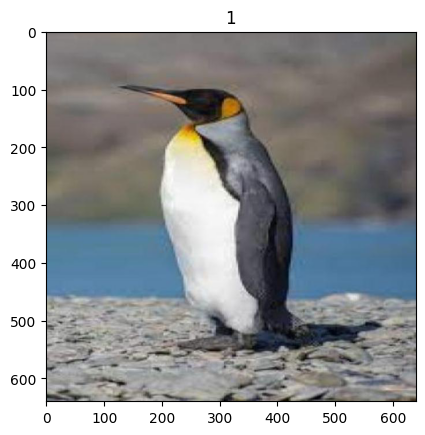

In [100]:
 # Read in the image and plot it using matplotlib
num=32
dir="train/train"

random_image = sorted(os.listdir(dir))
img = mpimg.imread(dir + "/" + random_image[num])
plt.imshow(img)
plt.title(df.category_id[num])

# Valid

Text(0.5, 1.0, '1')

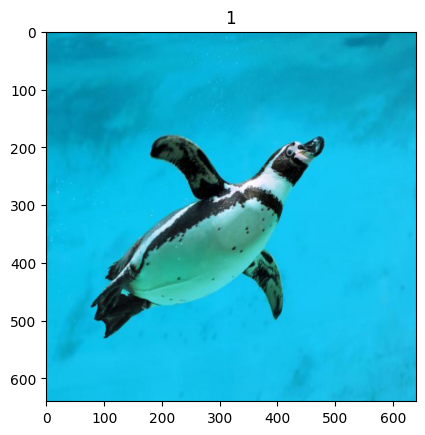

In [98]:
num=32

dir="valid/valid"

random_image = sorted(os.listdir(dir))
img = mpimg.imread( dir + "/" + random_image[num])
plt.imshow(img)
plt.title(df.category_id[num])

# Making image and label together

### Train

In [118]:
random_image = sorted(os.listdir("train/train"))

num_of_image_train = len(os.listdir("train/train"))
num_of_image_valid = len(os.listdir("valid/valid"))

x_train = []
y_train = []

for i in range(num_of_image_train):
  x_train.append(random_image[i])
  y_train.append(df.category_id[i])



### Valid

In [119]:
random_image = sorted(os.listdir("valid/valid"))


x_valid = []
y_valid = []

for i in range(num_of_image_valid ):
  x_valid.append(random_image[i])
  y_valid.append(df.category_id[i])


In [120]:
x_train[0] ,  y_train[0]  , x_valid[0] ,y_valid[0]

('image_id_000.jpg', 1, 'image_id_000.jpg', 1)

# Making a DataFrame

In [121]:
df_train=pd.DataFrame( {"X" : x_train ,"Y" : y_train })

df_valid=pd.DataFrame( {"X" : x_valid ,"Y" : y_valid  })

In [122]:
df_train.head(5)

,X,Y
0,image_id_000.jpg,1
1,image_id_001.jpg,1
2,image_id_002.jpg,2
3,image_id_003.jpg,2
4,image_id_004.jpg,1


In [123]:
df_train.count()

X    500
Y    500
dtype: int64

In [126]:
df_train.Y.value_counts()

1    250
2    250
Name: Y, dtype: int64

In [124]:
df_valid.head(5)

,X,Y
0,image_id_000.jpg,1
1,image_id_001.jpg,1
2,image_id_002.jpg,2
3,image_id_003.jpg,2
4,image_id_004.jpg,1


In [125]:
df_valid.count()

X    72
Y    72
dtype: int64

In [127]:
df_valid.Y.value_counts()

1    39
2    33
Name: Y, dtype: int64

# Making new folder

### Making train data in new folder

In [136]:
import os
import shutil

# Define source and destination folders
source_folder = 'train/train'
os.makedirs('content/label_train/Turtle', exist_ok=True)
os.makedirs('content/label_train/penguin', exist_ok=True)


In [142]:
files = os.listdir(source_folder)



def condition(filename,range):
  var=0
  if(df_train.X[range]==filename):var=df_train.Y[range]
  return  df_train.Y[range]

range=0

for file in files:
    if condition(file,range)== 2:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join('content/label_train/Turtle', file)
        shutil.move(source_path, destination_path)
    else:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join('content/label_train/penguin', file)
        shutil.move(source_path, destination_path)
    range=1+range

### Making validation data in new folder

In [143]:
# Define source and destination folders
source_folder = 'valid/valid'
os.makedirs('content/label_valid/Turtle', exist_ok=True)
os.makedirs('content/label_valid/penguin', exist_ok=True)

In [144]:
files = os.listdir(source_folder)


def condition(filename,range):
  var=0
  if(df_train.X[range]==filename):var=df_train.Y[range]
  return  df_train.Y[range]

range=0

for file in files:
    if condition(file,range)== 2:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join('content/label_valid/Turtle', file)
        shutil.move(source_path, destination_path)
    else:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join('content/label_valid/penguin', file)
        shutil.move(source_path, destination_path)
    range=1+range

# Prepossing for The Model

In [146]:
train_dir = "content/label_train/"
test_dir = "content/label_valid/"


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)



# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 500 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


### Batch Size

In [147]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Making the model

In [149]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])



# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


In [150]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
16/16 [==============================] - 17s 351ms/step - loss: 0.7373 - accuracy: 0.4600 - val_loss: 0.7254 - val_accuracy: 0.4583
Epoch 2/5
16/16 [==============================] - 4s 260ms/step - loss: 0.6984 - accuracy: 0.5060 - val_loss: 0.6948 - val_accuracy: 0.4583
Epoch 3/5
16/16 [==============================] - 4s 229ms/step - loss: 0.6910 - accuracy: 0.5260 - val_loss: 0.7095 - val_accuracy: 0.4444
Epoch 4/5
16/16 [==============================] - 4s 220ms/step - loss: 0.6835 - accuracy: 0.5960 - val_loss: 0.6999 - val_accuracy: 0.4722
Epoch 5/5
16/16 [==============================] - 4s 237ms/step - loss: 0.6604 - accuracy: 0.6140 - val_loss: 0.7035 - val_accuracy: 0.4861


In [151]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

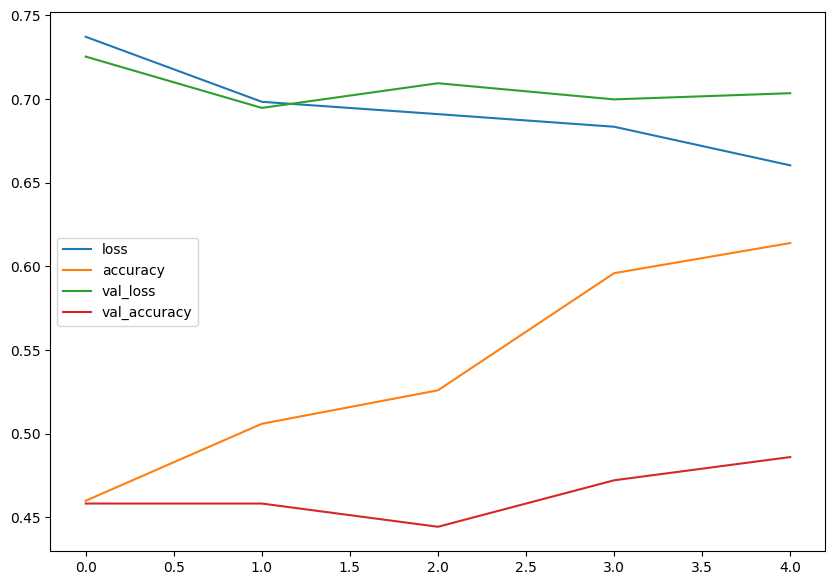

In [152]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

# Improving the model

In [153]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu")
  ,
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])



# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [154]:
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
16/16 [==============================] - 10s 353ms/step - loss: 0.6937 - accuracy: 0.5040 - val_loss: 0.6929 - val_accuracy: 0.5417
Epoch 2/10
16/16 [==============================] - 4s 228ms/step - loss: 0.6931 - accuracy: 0.4980 - val_loss: 0.6930 - val_accuracy: 0.5278
Epoch 3/10
16/16 [==============================] - 4s 230ms/step - loss: 0.6930 - accuracy: 0.5100 - val_loss: 0.6933 - val_accuracy: 0.5694
Epoch 4/10
16/16 [==============================] - 4s 231ms/step - loss: 0.6956 - accuracy: 0.5300 - val_loss: 0.6932 - val_accuracy: 0.4861
Epoch 5/10
16/16 [==============================] - 4s 233ms/step - loss: 0.6930 - accuracy: 0.5180 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 6/10
16/16 [==============================] - 4s 280ms/step - loss: 0.6919 - accuracy: 0.5300 - val_loss: 0.7000 - val_accuracy: 0.4583
Epoch 7/10
16/16 [==============================] - 4s 232ms/step - loss: 0.6896 - accuracy: 0.5460 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch

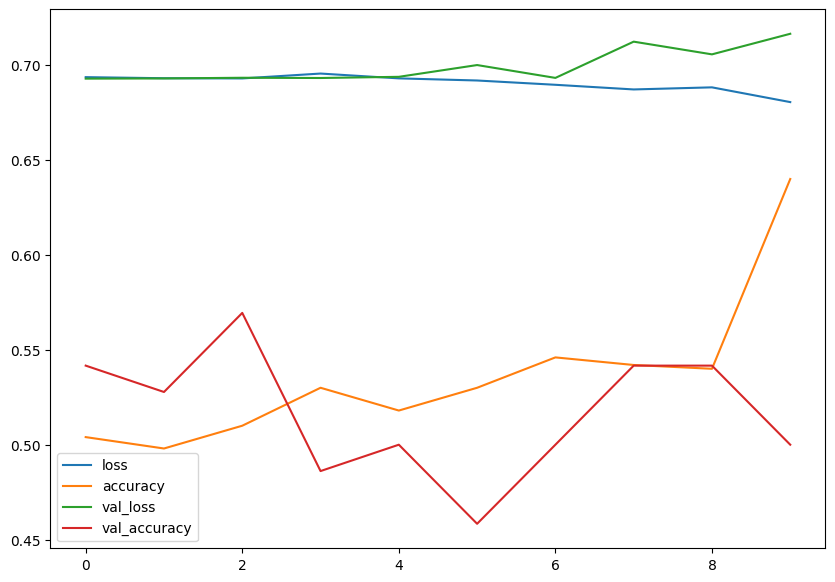

In [155]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10, 7));

# The model is overfitted

###  Making againg improvement in model

In [156]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu")
  ,
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(50, 3, activation="relu"),
  tf.keras.layers.Conv2D(50, 3, activation="relu"),
  tf.keras.layers.Conv2D(50, 3, activation="relu"),
  tf.keras.layers.Conv2D(50, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])



# Compile the model
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [157]:
# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
16/16 [==============================] - 36s 1s/step - loss: 0.6998 - accuracy: 0.4960 - val_loss: 0.6937 - val_accuracy: 0.4583
Epoch 2/10
16/16 [==============================] - 8s 513ms/step - loss: 0.6936 - accuracy: 0.4860 - val_loss: 0.6935 - val_accuracy: 0.4583
Epoch 3/10
16/16 [==============================] - 8s 498ms/step - loss: 0.6945 - accuracy: 0.5080 - val_loss: 0.6954 - val_accuracy: 0.4583
Epoch 4/10
16/16 [==============================] - 8s 498ms/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.6951 - val_accuracy: 0.4583
Epoch 5/10
16/16 [==============================] - 8s 498ms/step - loss: 0.6929 - accuracy: 0.5160 - val_loss: 0.6929 - val_accuracy: 0.5417
Epoch 6/10
16/16 [==============================] - 8s 499ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5417
Epoch 7/10
16/16 [==============================] - 8s 493ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5417
Epoch 8/

# Comparing model 3 and model 2

Text(0.5, 1.0, 'history_3')

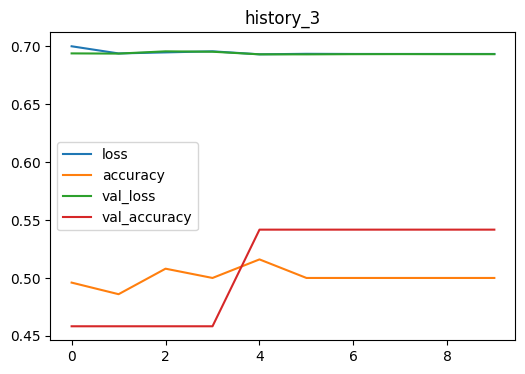

In [166]:
pd.DataFrame(history_3.history).plot(figsize=(6, 4));
plt.title("history_3")


Text(0.5, 1.0, 'history_2')

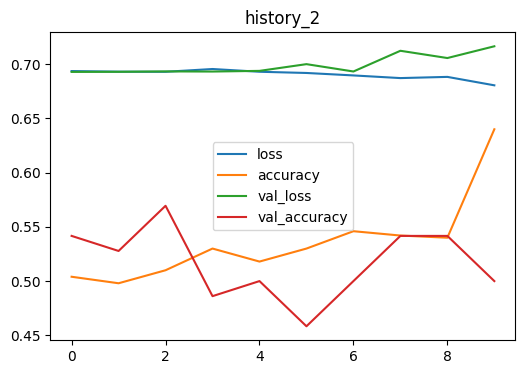

In [165]:
pd.DataFrame(history_2.history).plot(figsize=(6, 4));
plt.title("history_2")

# Changing the epochs number

# Model 4

In [172]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(200, 3, activation="relu"),
  tf.keras.layers.Conv2D(200, 3, activation="relu"),
  tf.keras.layers.Conv2D(200, 3, activation="relu"),
  tf.keras.layers.Conv2D(200, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(50, 3, activation="relu"),
  tf.keras.layers.Conv2D(50, 3, activation="relu"),
  tf.keras.layers.Conv2D(50, 3, activation="relu"),
  tf.keras.layers.Conv2D(50, 3, activation="relu"),
  tf.keras.layers.Conv2D(50, 3, activation="relu"),
  tf.keras.layers.Conv2D(50, 3, activation="relu"),
  tf.keras.layers.Conv2D(50, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])



# Compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [174]:
history_4 = model_4.fit(train_data,
                        epochs=25,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/25
16/16 [==============================] - 79s 5s/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5417
Epoch 2/25
16/16 [==============================] - 39s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5417
Epoch 3/25
16/16 [==============================] - 39s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5417
Epoch 4/25
16/16 [==============================] - 40s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5417
Epoch 5/25
16/16 [==============================] - 39s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5417
Epoch 6/25
16/16 [==============================] - 39s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5417
Epoch 7/25
16/16 [==============================] - 39s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5417
Epoch 8/25
16/16 [==

# Data augmentation

In [175]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


In [178]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 500 images belonging to 2 classes.
Non-augmented training images:
Found 500 images belonging to 2 classes.
Unchanged test images:
Found 72 images belonging to 2 classes.


In [179]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

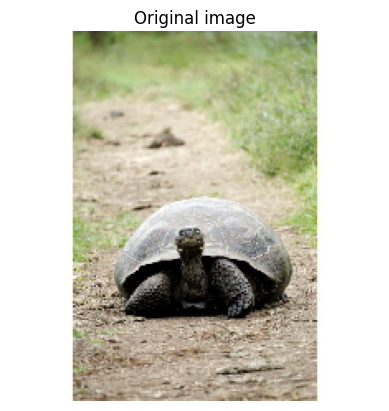

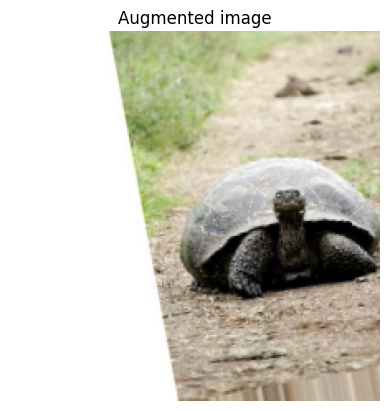

In [180]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [182]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_5 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu")
  ,
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"),
  tf.keras.layers.Conv2D(100, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(50, 3, activation="relu"),
  tf.keras.layers.Conv2D(50, 3, activation="relu"),
  tf.keras.layers.Conv2D(50, 3, activation="relu"),
  tf.keras.layers.Conv2D(50, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])



# Compile the model
model_5.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [183]:

history_5 = model_5.fit(train_data_augmented, # changed to augmented training data
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
16/16 [==============================] - 16s 701ms/step - loss: 1.2334 - accuracy: 0.3720 - val_loss: 0.6932 - val_accuracy: 0.4583
Epoch 2/10
16/16 [==============================] - 12s 706ms/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.4583
Epoch 3/10
16/16 [==============================] - 11s 701ms/step - loss: 0.6952 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.4583
Epoch 4/10
16/16 [==============================] - 11s 690ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4583
Epoch 5/10
16/16 [==============================] - 11s 688ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.4583
Epoch 6/10
16/16 [==============================] - 11s 698ms/step - loss: 0.6933 - accuracy: 0.2440 - val_loss: 0.6931 - val_accuracy: 0.4583
Epoch 7/10
16/16 [==============================] - 12s 737ms/step - loss: 0.6932 - accuracy: 0.3320 - val_loss: 0.6932 - val_accuracy: 0.4583

Text(0.5, 1.0, 'history_5')

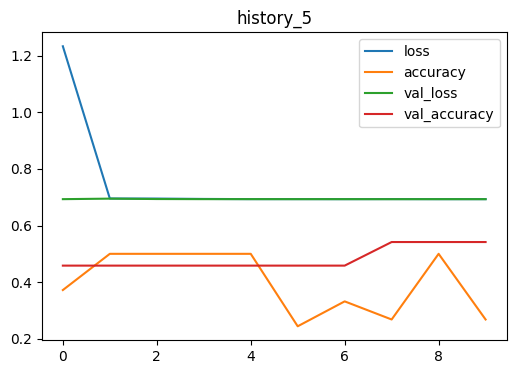

In [184]:
pd.DataFrame(history_5.history).plot(figsize=(6, 4));
plt.title("history_5")

# Data augmantaion is not effective here

### Still testing
### Testing in model 4  , This model is more complex

In [187]:
history_6 = model_4.fit(train_data_augmented, # changed to augmented training data
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
16/16 [==============================] - 39s 2s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5417
Epoch 2/10
16/16 [==============================] - 37s 2s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5417
Epoch 3/10
16/16 [==============================] - 37s 2s/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5417
Epoch 4/10
16/16 [==============================] - 37s 2s/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5417
Epoch 5/10
16/16 [==============================] - 37s 2s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5417
Epoch 6/10
16/16 [==============================] - 39s 2s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5417
Epoch 7/10
16/16 [==============================] - 37s 2s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5417
Epoch 8/10
16/16 [==

Text(0.5, 1.0, 'history_6')

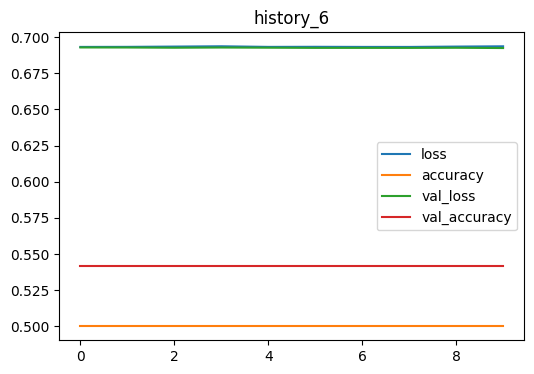

In [188]:
pd.DataFrame(history_6.history).plot(figsize=(6, 4));
plt.title("history_6")